# Code to plot all figures 

Created by Dani Lafarga on 7/27/22

This code will plot all figures from the paper Three-Dimensional Empirical Orthogonal Functions Computed From An Ocean General Circulation Model: Mode Visualization and equatorial Upwelling. Each section will be numbered acording to each figure
Things to keep in mind:
- You may need to download Basemap before importing it bellow 
        - you can do this by using pip. Copy and paste the line below in terminal
                pip install basemap

- There is no need to download the data files as the files are downloaded directly from github
        - you can run this notebook on its own
- As long as you run this first section you can run every other section out of order

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib
from numpy import linspace
from numpy import meshgrid
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import dash
from dash import dcc
from dash import html
import plotly.graph_objects as go

import math
import warnings

In [2]:
# All Depths 
depths = [5, 10, 20, 30, 50, 75, 100, 125, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1750, 2000, 3000, 3500, 4000, 4500, 5000, 5500]
tot_depth = len(depths)

In [3]:
# All months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

In [4]:
# this is for formatting the colorbar for every plot
bottom2 = cm.get_cmap('winter', 128)   # get winter colorbar to use for bottom half of colorbar
top2 = cm.get_cmap('hot_r', 128)       # get revers hot colorbar to use for top half of colorbar

newcolors2 = np.vstack((bottom2(np.linspace(0, 1, 128)),
                    top2(np.linspace(0, .9, 128))))       # stack colorbars on top of each other
newcmp2 = ListedColormap(newcolors2, name='OrangeBlue')   # name new colorbar newcmp2

In [6]:
# Read in EOF files THIS MIGHT TAKE A WHILE
url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/phys_EOFs/Jan_phys_EOFs.csv' #URL of EOF File
file = pd.read_csv(url,header = None) # read in url with EOFs
EOF1 = np.array(file) # turn file into an array
EOF1 = EOF1.squeeze()  # remove unnecessary 1 dimension 

url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/phys_EOFs/Aug_phys_EOFs.csv' #URL of EOF File
file = pd.read_csv(url,header = None) # read in url with EOFs
EOF2 = np.array(file) # turn file into an array
EOF2 = EOF2.squeeze() # remove unnecessary 1 dimension 

In [7]:
# read in eigenvalues for each month
evals = np.empty((12,54)) # data matrix for each eigenvlue of each month
for i in range(12):
    month = months[i]
    url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/eigen/'+month+'_eval.csv' # URL with months evals
    data = pd.read_csv(url,header = None)  # read in evals
    evals[i,:] = np.array(np.squeeze(data)) # put evals where mode is column and month is each row

In [8]:
# For Cross Section Plots
crosssec1 = np.reshape(EOF1, (32,180,360, 54)) # cross section matrix for January
crosssec2 = np.reshape(EOF2, (32,180,360, 54)) # cros section matrix for August

## Figure 1

3D figures will run on browser in docker. You will need to interrupt the Kernel to exit the 3D fig

In [29]:
url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/OGCM/fig1.csv' # URL with Jan 1950 OGCM
clipped_data = pd.read_csv(url,header = None) # read in url
clipped_data = np.array(clipped_data) # turn file into an array
clipped_data = clipped_data.squeeze() # remove unnecessary 1 dimension 

In [30]:
# I cannot label every depth or it will look too crouded
# instead only take certain depth names and evenly space each depth
dep_names = ['5', '10', '20', '30', '50', '75', '100', '125', '150', '200', '250', '300', '400', '500', '600', '700', '800', '900', '1000', '1100', '1200', '1300', '1400', '1500', '1750', '2000', '3000', '3500', '4000', '4500', '5000', '5500']
new_depths = np.arange(5,15*tot_depth+1, 15) #evenly spaving each depth

lons = np.linspace(0,360-1,360)  # longitude names
lats = np.linspace(-90,90-1,180) # latitude names
xx,yy = np.meshgrid(lons,lats) # create matrix with lat and lon points 

A = np.zeros(xx.shape) - depths[0] # create matrix where all values are the first depth

#### IMPORTANT
- DO NOT forget to inturrupt Kernel after you are done plotting the fig
- The code below WILL NOT finish runnning unless you stop it!

In [31]:
# plot the first surface where:
#    - x is longitude values
#    - y is latitude values
#    - z is the depth values
#    - surface color is based on the temperature
# arguments
#    - colorbar: to title the colorbar and position the title
#    - colorscale: these are chosen from https://plotly.com/python/builtin-colorscales/
#    - opacity: how opaque the first layer will be
fig = go.Figure(data=[
    go.Surface(x=xx, y=yy, z=A, surfacecolor=np.reshape(clipped_data[0:64800], (360, 180)).T, 
               colorbar = {"title": "ᵒC", "titleside":"top"}, 
               colorscale = 'edge',
               opacity = 1),
])

# plot the rest of the surfaces where:
#    - x is longitude values
#    - y is latitude values
#    - z is the depth values
#    - surface color is based on the temperature
# Variables
#    - layers: matrix with all values equal to the depth
#    - OGCMn: matix with the temperatures

for i in range(len(depths)-1):
    layer = 0*np.empty(xx.shape) - new_depths[i]
    OGCMn = np.reshape(clipped_data[i * 64800: (i + 1) * 64800], (360, 180)).T
    fig.add_trace(go.Surface(x =xx, y =yy, z=layer, surfacecolor = OGCMn, colorscale = 'edge', showscale = False, opacity = .99))


# Colorbar formatting
fig.update_traces(cmax= 35, selector=dict(type='surface')) # the maximum value the colorbar will hit, values above this will be capped
fig.update_traces(cmin= -15, selector=dict(type='surface'))# the minimum value the colorbar will hit, values below this will be capped
fig.update_traces(colorbar_tickfont_size=25)   # changes tick size (length)
fig.update_traces(colorbar_thickness=45)       # changes colorbar thickness
fig.update_traces(colorbar_title_font_size=30) # changes title size
fig.update_traces(colorbar_x = .9)             # shifts the position of the colorbar on the x axis 

fig.update_layout(scene = dict(aspectratio = dict(x = 1.5, y = 1, z = .95))) # changes the width, length, and  height of plot

# Different types of customized ticks
# change depth names
fig.update_layout(scene = dict(
                    zaxis = dict(
                        ticktext = dep_names[0:32:4],
                        tickvals = new_depths[0:32:4] * -1),
                    )
                 )
# chnage longitude names
fig.update_layout(scene=dict(
    xaxis=dict(
        ticktext=['0⁰', '60⁰E', '120⁰E', '180⁰','120⁰W', '60⁰W', '0⁰'],
        tickvals=np.linspace(0, 360, 7)),
    )
)

fig.update_scenes(xaxis_tickfont_size = 13) # change xaxis fontsize
fig.update_scenes(yaxis_tickfont_size = 13) # change yaxis fontsize
fig.update_scenes(zaxis_tickfont_size = 13) # change zaxis fontsize



fig.update_layout(title = 'January 1950 OGCM Temperatures[ᵒC]' , title_font_size = 27) # title of entire plot

# name axis
fig.update_layout(scene = dict(
                xaxis_title='Longitude',
                xaxis_title_font_size = 20,
    
                yaxis_title='Latitude', 
                yaxis_title_font_size = 20,

                zaxis_title='Depth[m]',
                zaxis_title_font_size = 20)
                 )

fig.update_layout(height=600)      # make whole plot space it taller
fig.update_yaxes(automargin=True)  # add margins 

# use dash to open plot in browser
app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader = False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


### Figure 2(a)

3D figures will run on browser in docker. You will need to interrupt the Kernel to exit the 3D fig

In [32]:
url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/OGCM/fig2a.csv' # URL with January Climatology
clipped_data = pd.read_csv(url,header = None) # read in url
clipped_data = np.array(clipped_data) # turn file into an array
clipped_data = clipped_data.squeeze() # remove unnecessary 1 dimension 

In [33]:
# I cannot label every depth or it will look too crouded
# instead only take certain depth names and evenly space each depth
dep_names = ['5', '10', '20', '30', '50', '75', '100', '125', '150', '200', '250', '300', '400', '500', '600', '700', '800', '900', '1000', '1100', '1200', '1300', '1400', '1500', '1750', '2000', '3000', '3500', '4000', '4500', '5000', '5500']
new_depths = np.arange(5,15*tot_depth+1, 15) #evenly spaving each depth

lons = np.linspace(0,360-1,360)  # longitude names
lats = np.linspace(-90,90-1,180) # latitude names
xx,yy = np.meshgrid(lons,lats) # create matrix with lat and lon points 

A = np.zeros(xx.shape) - depths[0] # create matrix where all values are the first depth

#### IMPORTANT
- DO NOT forget to inturrupt Kernel after you are done plotting the fig
- The code below WILL NOT finish runnning unless you stop it!

In [34]:
# plot the first surface where:
#    - x is longitude values
#    - y is latitude values
#    - z is the depth values
#    - surface color is based on the temperature
# arguments
#    - colorbar: to title the colorbar and position the title
#    - colorscale: these are chosen from https://plotly.com/python/builtin-colorscales/
#    - opacity: how opaque the first layer will be
fig = go.Figure(data=[
    go.Surface(x = xx, y = yy, z= A, surfacecolor = np.reshape(clipped_data[0:64800], (180,360)),
               colorbar = {"title": "ᵒC", "titleside":"top"}, 
               colorscale = 'edge',
               opacity = 1),
])

# plot the rest of the surfaces where:
#    - x is longitude values
#    - y is latitude values
#    - z is the depth values
#    - surface color is based on the temperature
# Variables
#    - layers: matrix with all values equal to the depth
#    - OGCMn: matix with the temperatures
for i in range(len(depths)-1):
    layer = 0*np.empty(xx.shape) - new_depths[i]
    Climn = np.reshape(clipped_data[i *64800: (i+1) *64800],(180,360))
    fig.add_trace(go.Surface(x =xx, y =yy, z=layer, surfacecolor = Climn, colorscale = 'edge', showscale = False, opacity = .99))


# Colorbar formatting
fig.update_traces(cmax= 35, selector=dict(type='surface')) # the maximum value the colorbar will hit, values above this will be capped
fig.update_traces(cmin= -15, selector=dict(type='surface'))# the minimum value the colorbar will hit, values below this will be capped
fig.update_traces(colorbar_tickfont_size=25)   # changes tick size (length)
fig.update_traces(colorbar_thickness=45)       # changes colorbar thickness
fig.update_traces(colorbar_title_font_size=30) # changes title size
fig.update_traces(colorbar_x = .9)             # shifts the position of the colorbar on the x axis 

fig.update_layout(scene = dict(aspectratio = dict(x = 1.5, y = 1, z = .95))) # changes the width, length, and  height of plot

# Different types of customized ticks
# change depth names
fig.update_layout(scene = dict(
                    zaxis = dict(
                        ticktext = dep_names[0:32:4],
                        tickvals = new_depths[0:32:4] * -1),
                    )
                 )
# chnage longitude names
fig.update_layout(scene=dict(
    xaxis=dict(
        ticktext=['0⁰', '60⁰E', '120⁰E', '180⁰','120⁰W', '60⁰W', '0⁰'],
        tickvals=np.linspace(0, 360, 7)),
    )
)

fig.update_scenes(xaxis_tickfont_size = 13) # change xaxis fontsize
fig.update_scenes(yaxis_tickfont_size = 13) # change yaxis fontsize
fig.update_scenes(zaxis_tickfont_size = 13) # change zaxis fontsize


fig.update_layout(title = 'January Climatology Temperatures[ᵒC]' , title_font_size = 27)

# name axis
fig.update_layout(scene = dict(
                xaxis_title='Longitude',
                xaxis_title_font_size = 20,
    
                yaxis_title='Latitude', 
                yaxis_title_font_size = 20,

                zaxis_title='Depth[m]',
                zaxis_title_font_size = 20)
                 )

fig.update_layout(height=600)      # make whole plot space it taller
fig.update_yaxes(automargin=True)  # add margins 

# use dash to open plot in browser
app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader = False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


## Figure 2(b)

In [35]:
url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/OGCM/fig2b.csv' # URL with August Climatology
clipped_data = pd.read_csv(url,header = None) # read in url
clipped_data = np.array(clipped_data) # turn file into an array
clipped_data = clipped_data.squeeze() # remove unnecessary 1 dimension 

In [36]:
# I cannot label every depth or it will look too crouded
# instead only take certain depth names and evenly space each depth
dep_names = ['5', '10', '20', '30', '50', '75', '100', '125', '150', '200', '250', '300', '400', '500', '600', '700', '800', '900', '1000', '1100', '1200', '1300', '1400', '1500', '1750', '2000', '3000', '3500', '4000', '4500', '5000', '5500']
new_depths = np.arange(5,15*tot_depth+1, 15) #evenly spaving each depth

lons = np.linspace(0,360-1,360)  # longitude names
lats = np.linspace(-90,90-1,180) # latitude names
xx,yy = np.meshgrid(lons,lats) # create matrix with lat and lon points 

A = np.zeros(xx.shape) - depths[0] # create matrix where all values are the first depth

#### IMPORTANT
- DO NOT forget to inturrupt Kernel after you are done plotting the fig
- The code below WILL NOT finish runnning unless you stop it!

In [37]:
# plot the first surface where:
#    - x is longitude values
#    - y is latitude values
#    - z is the depth values
#    - surface color is based on the temperature
# arguments
#    - colorbar: to title the colorbar and position the title
#    - colorscale: these are chosen from https://plotly.com/python/builtin-colorscales/
#    - opacity: how opaque the first layer will be
fig = go.Figure(data=[
    go.Surface(x = xx, y = yy, z= A, surfacecolor = np.reshape(clipped_data[0:64800], (180,360)),
               colorbar = {"title": "ᵒC", "titleside":"top"}, 
               colorscale = 'edge',
               opacity = 1),
])

# plot the rest of the surfaces where:
#    - x is longitude values
#    - y is latitude values
#    - z is the depth values
#    - surface color is based on the temperature
# Variables
#    - layers: matrix with all values equal to the depth
#    - OGCMn: matix with the temperatures
for i in range(len(depths)-1):
    layer = 0*np.empty(xx.shape) - new_depths[i]
    Climn = np.reshape(clipped_data[i *64800: (i+1) *64800],(180,360))
    fig.add_trace(go.Surface(x =xx, y =yy, z=layer, surfacecolor = Climn, colorscale = 'edge', showscale = False, opacity = .99))


# Colorbar formatting
fig.update_traces(cmax= 35, selector=dict(type='surface')) # the maximum value the colorbar will hit, values above this will be capped
fig.update_traces(cmin= -15, selector=dict(type='surface'))# the minimum value the colorbar will hit, values below this will be capped
fig.update_traces(colorbar_tickfont_size=25)   # changes tick size (length)
fig.update_traces(colorbar_thickness=45)       # changes colorbar thickness
fig.update_traces(colorbar_title_font_size=30) # changes title size
fig.update_traces(colorbar_x = .9)             # shifts the position of the colorbar on the x axis 

fig.update_layout(scene = dict(aspectratio = dict(x = 1.5, y = 1, z = .95))) # changes the width, length, and  height of plot

# Different types of customized ticks
# change depth names
fig.update_layout(scene = dict(
                    zaxis = dict(
                        ticktext = dep_names[0:32:4],
                        tickvals = new_depths[0:32:4] * -1),
                    )
                 )
# chnage longitude names
fig.update_layout(scene=dict(
    xaxis=dict(
        ticktext=['0⁰', '60⁰E', '120⁰E', '180⁰','120⁰W', '60⁰W', '0⁰'],
        tickvals=np.linspace(0, 360, 7)),
    )
)

fig.update_scenes(xaxis_tickfont_size = 13) # change xaxis fontsize
fig.update_scenes(yaxis_tickfont_size = 13) # change yaxis fontsize
fig.update_scenes(zaxis_tickfont_size = 13) # change zaxis fontsize


fig.update_layout(title = 'August Climatology Temperatures[ᵒC]' , title_font_size = 27)

# name axis
fig.update_layout(scene = dict(
                xaxis_title='Longitude',
                xaxis_title_font_size = 20,
    
                yaxis_title='Latitude', 
                yaxis_title_font_size = 20,

                zaxis_title='Depth[m]',
                zaxis_title_font_size = 20)
                 )

fig.update_layout(height=600)      # make whole plot space it taller
fig.update_yaxes(automargin=True)  # add margins 

# use dash to open plot in browser
app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader = False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


### Figure 3(a)

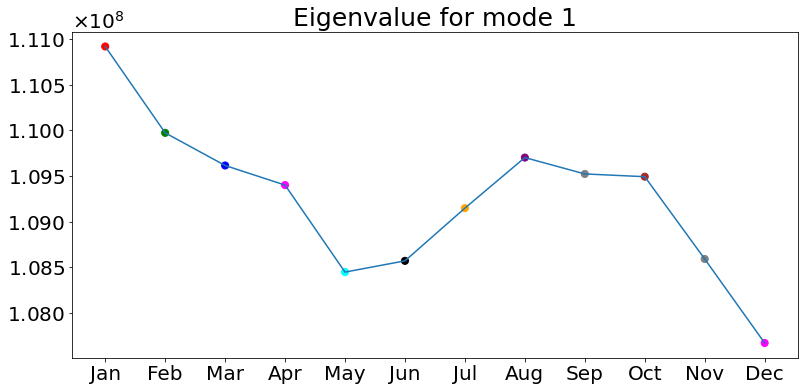

In [9]:
# plotting evals for the first mode
plt.figure(figsize=(13.,6.)) # fig size
title_sz = 25
label_sz = 20
mode = 1 # plot 1st Mode

colors = np.array(["red","green","blue","magenta","cyan","black","orange","purple","grey","brown","gray","magenta"]) # point colors
time = np.arange(1,13) # plotting 12 points
plt.scatter(time, evals[:,mode -1], c = colors, s =50) # plot evals as points
plt.plot(time, evals[:,mode -1]) # connect each moint

# axis labels
plt.title('Eigenvalue for mode '+ str(mode), fontsize = title_sz) 
plt.xticks(time, months , fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ticklabel_format(useMathText=True, axis='y', scilimits=(0,0)) # format y axis to scientific notation

# set size of exponent
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(label_sz)

plt.show()

### Figure 3(b)

In [12]:
num_eval = np.arange(evals.shape[1])+1 # label for mode
cumulative_eval = np.cumsum(evals[0])  # cumulative sum of January eval

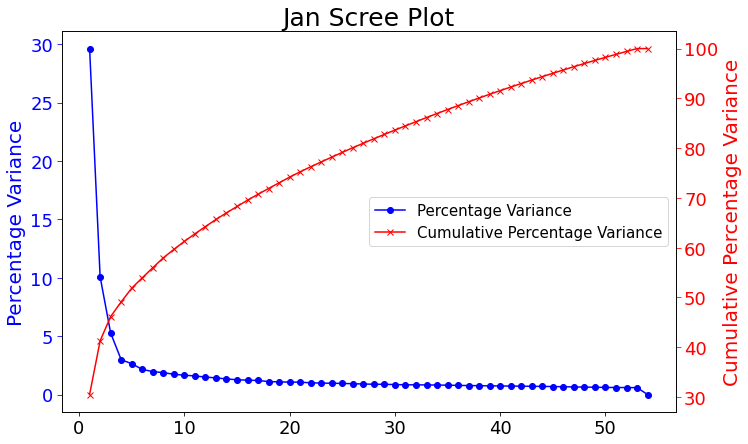

In [14]:
fig, ax = plt.subplots()

fig.set_size_inches(11., 7.)
title_sz = 25
label_sz = 20
tick_sz = 5
# plotting Percentage Variance
p1, = plt.plot(num_eval,(data[0]/cumulative_eval[-1])*100, 'b',marker = 'o',label = 'Percentage Variance')
# formatting for left axis
ax.set_ylabel("Percentage Variance", size = label_sz)
ax.tick_params('y', colors='b',size = tick_sz, labelsize = label_sz-2)
ax.yaxis.label.set_color('blue')
plt.xticks(fontsize= label_sz-2)

# plotting Cummulative Percentage Variance
ax2 = ax.twinx()
p2, = plt.plot(num_eval,(cumulative_eval/cumulative_eval[-1])*100,'r',marker = 'x',label = 'Cumulative Percentage Variance')
# formatting for right axis
ax2.tick_params('y', colors='r',size = tick_sz, labelsize = label_sz-2)
ax2.set_ylabel("Cumulative Percentage Variance", size = label_sz)
ax2.yaxis.label.set_color('red')


plt.legend(handles=[p1,p2],loc='center right', fontsize = label_sz-5)
plt.title(months[0]+ ' Scree Plot', size = title_sz)
plt.show()

### Figure 3(c)

In [15]:
num_eval = np.arange(evals.shape[1])+1 # label for mode
cumulative_eval = np.cumsum(evals[7])  # cumulative sum of August eval

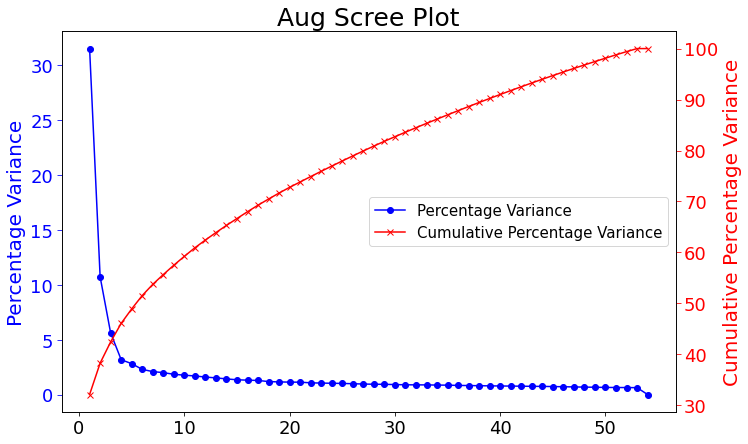

In [16]:
fig, ax = plt.subplots()

fig.set_size_inches(11., 7.)
title_sz = 25
label_sz = 20
tick_sz = 5
# plotting Percentage Variance
p1, = plt.plot(num_eval,(data[0]/cumulative_eval[-1])*100, 'b',marker = 'o',label = 'Percentage Variance')
# formatting for left axis
ax.set_ylabel("Percentage Variance", size = label_sz)
ax.tick_params('y', colors='b',size = tick_sz, labelsize = label_sz-2)
ax.yaxis.label.set_color('blue')
plt.xticks(fontsize= label_sz-2)

# plotting Cummulative Percentage Variance
ax2 = ax.twinx()
p2, = plt.plot(num_eval,(cumulative_eval/cumulative_eval[-1])*100,'r',marker = 'x',label = 'Cumulative Percentage Variance')
# formatting for right axis
ax2.tick_params('y', colors='r',size = tick_sz, labelsize = label_sz-2)
ax2.set_ylabel("Cumulative Percentage Variance", size = label_sz)
ax2.yaxis.label.set_color('red')


plt.legend(handles=[p1,p2],loc='center right', fontsize = label_sz-5)
plt.title(months[7]+ ' Scree Plot', size = title_sz)

plt.show()

### Figure 4

In [17]:
## Plot EOF
x = linspace(0, 360-1, 360) 
y = linspace(-90, 90-1, 180)

xx, yy = meshgrid(x, y)

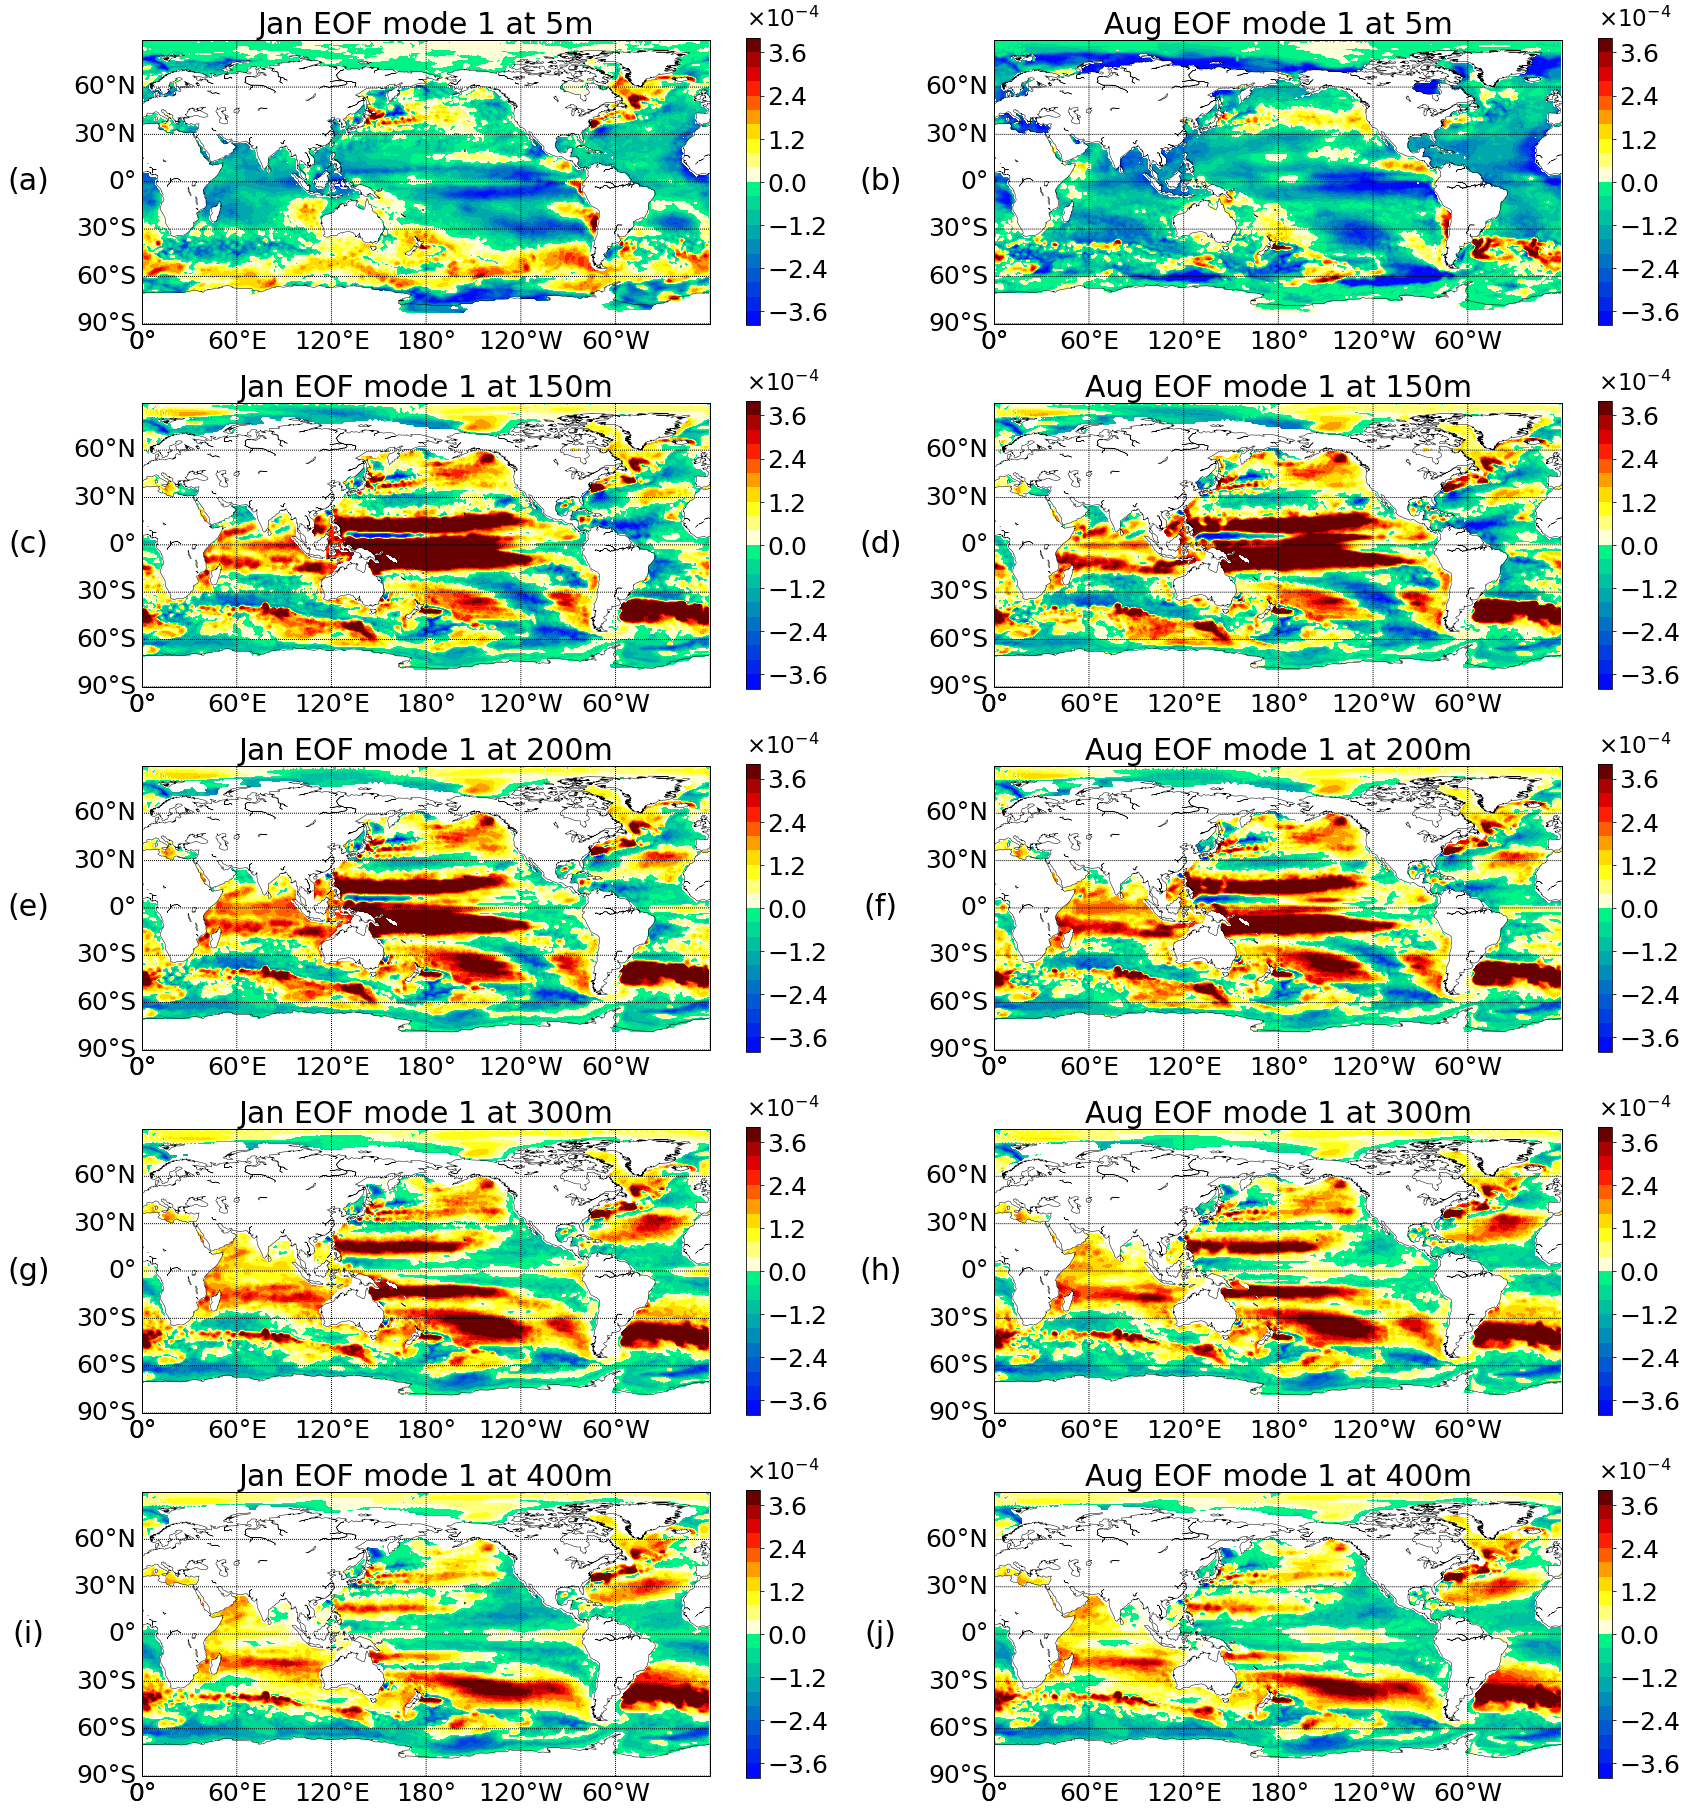

In [18]:
mode = 1 # plottin

fig = plt.figure(figsize=(28.,59.))
title_sz = 30
label_sz = 25
exp_sz = 23

#-------------------------------
# First row
# left
ax = fig.add_subplot(9,2,1)

depth_ind = 0 # define depth
depth = depths[depth_ind] # depth name

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0) # plot map 

EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360)) # matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2)   # plot EOF

mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines in black
mymap.drawmapboundary()

plt.ylabel('(a)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45)

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

#-------------------------------
# First row
# right
ax = fig.add_subplot(9,2,2)


mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2) # plot EOFs

mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines in black
mymap.drawmapboundary()


plt.ylabel('(b)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label 

plt.title('Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# Second row
# left
ax = fig.add_subplot(9,2,3)

depth_ind = 8
depth = depths[depth_ind]

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)

EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2) # plot EOFs

mymap.drawcoastlines(color='black', linewidth=.5)# draw coastlines in black
mymap.drawmapboundary()

plt.ylabel('(c)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label 

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

#-------------------------------
# Second row
# right
ax = fig.add_subplot(9,2,4)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)

EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2)  # plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()

plt.ylabel('(d)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label 

plt.title('Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# third row
# left
ax = fig.add_subplot(9,2,5)

depth_ind = 9

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)

depth = depths[depth_ind]


EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2) # plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()

plt.ylabel('(e)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# third row
# right
ax = fig.add_subplot(9,2,6)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)

EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()


plt.ylabel('(f)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title( 'Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# fourth row
# left
ax = fig.add_subplot(9,2,7)

depth_ind = 11
depth = depths[depth_ind]

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values


mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()


plt.ylabel('(g)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# fourth row
# right
ax = fig.add_subplot(9,2,8)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()


plt.ylabel('(h)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# fifth row
# left
ax = fig.add_subplot(9,2,9)

depth_ind = 12
depth = depths[depth_ind]

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()

plt.ylabel('(i)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# fifth row
# right
ax = fig.add_subplot(9,2,10)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()


plt.ylabel('(j)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()


plt.show()

### Figure 5

In [19]:
lons = np.linspace(0,360-1,360)
lats = np.linspace(-90, 90-1, 180)
yz,zy = np.meshgrid(lats, depths)
xz,zx = np.meshgrid(lons, depths)

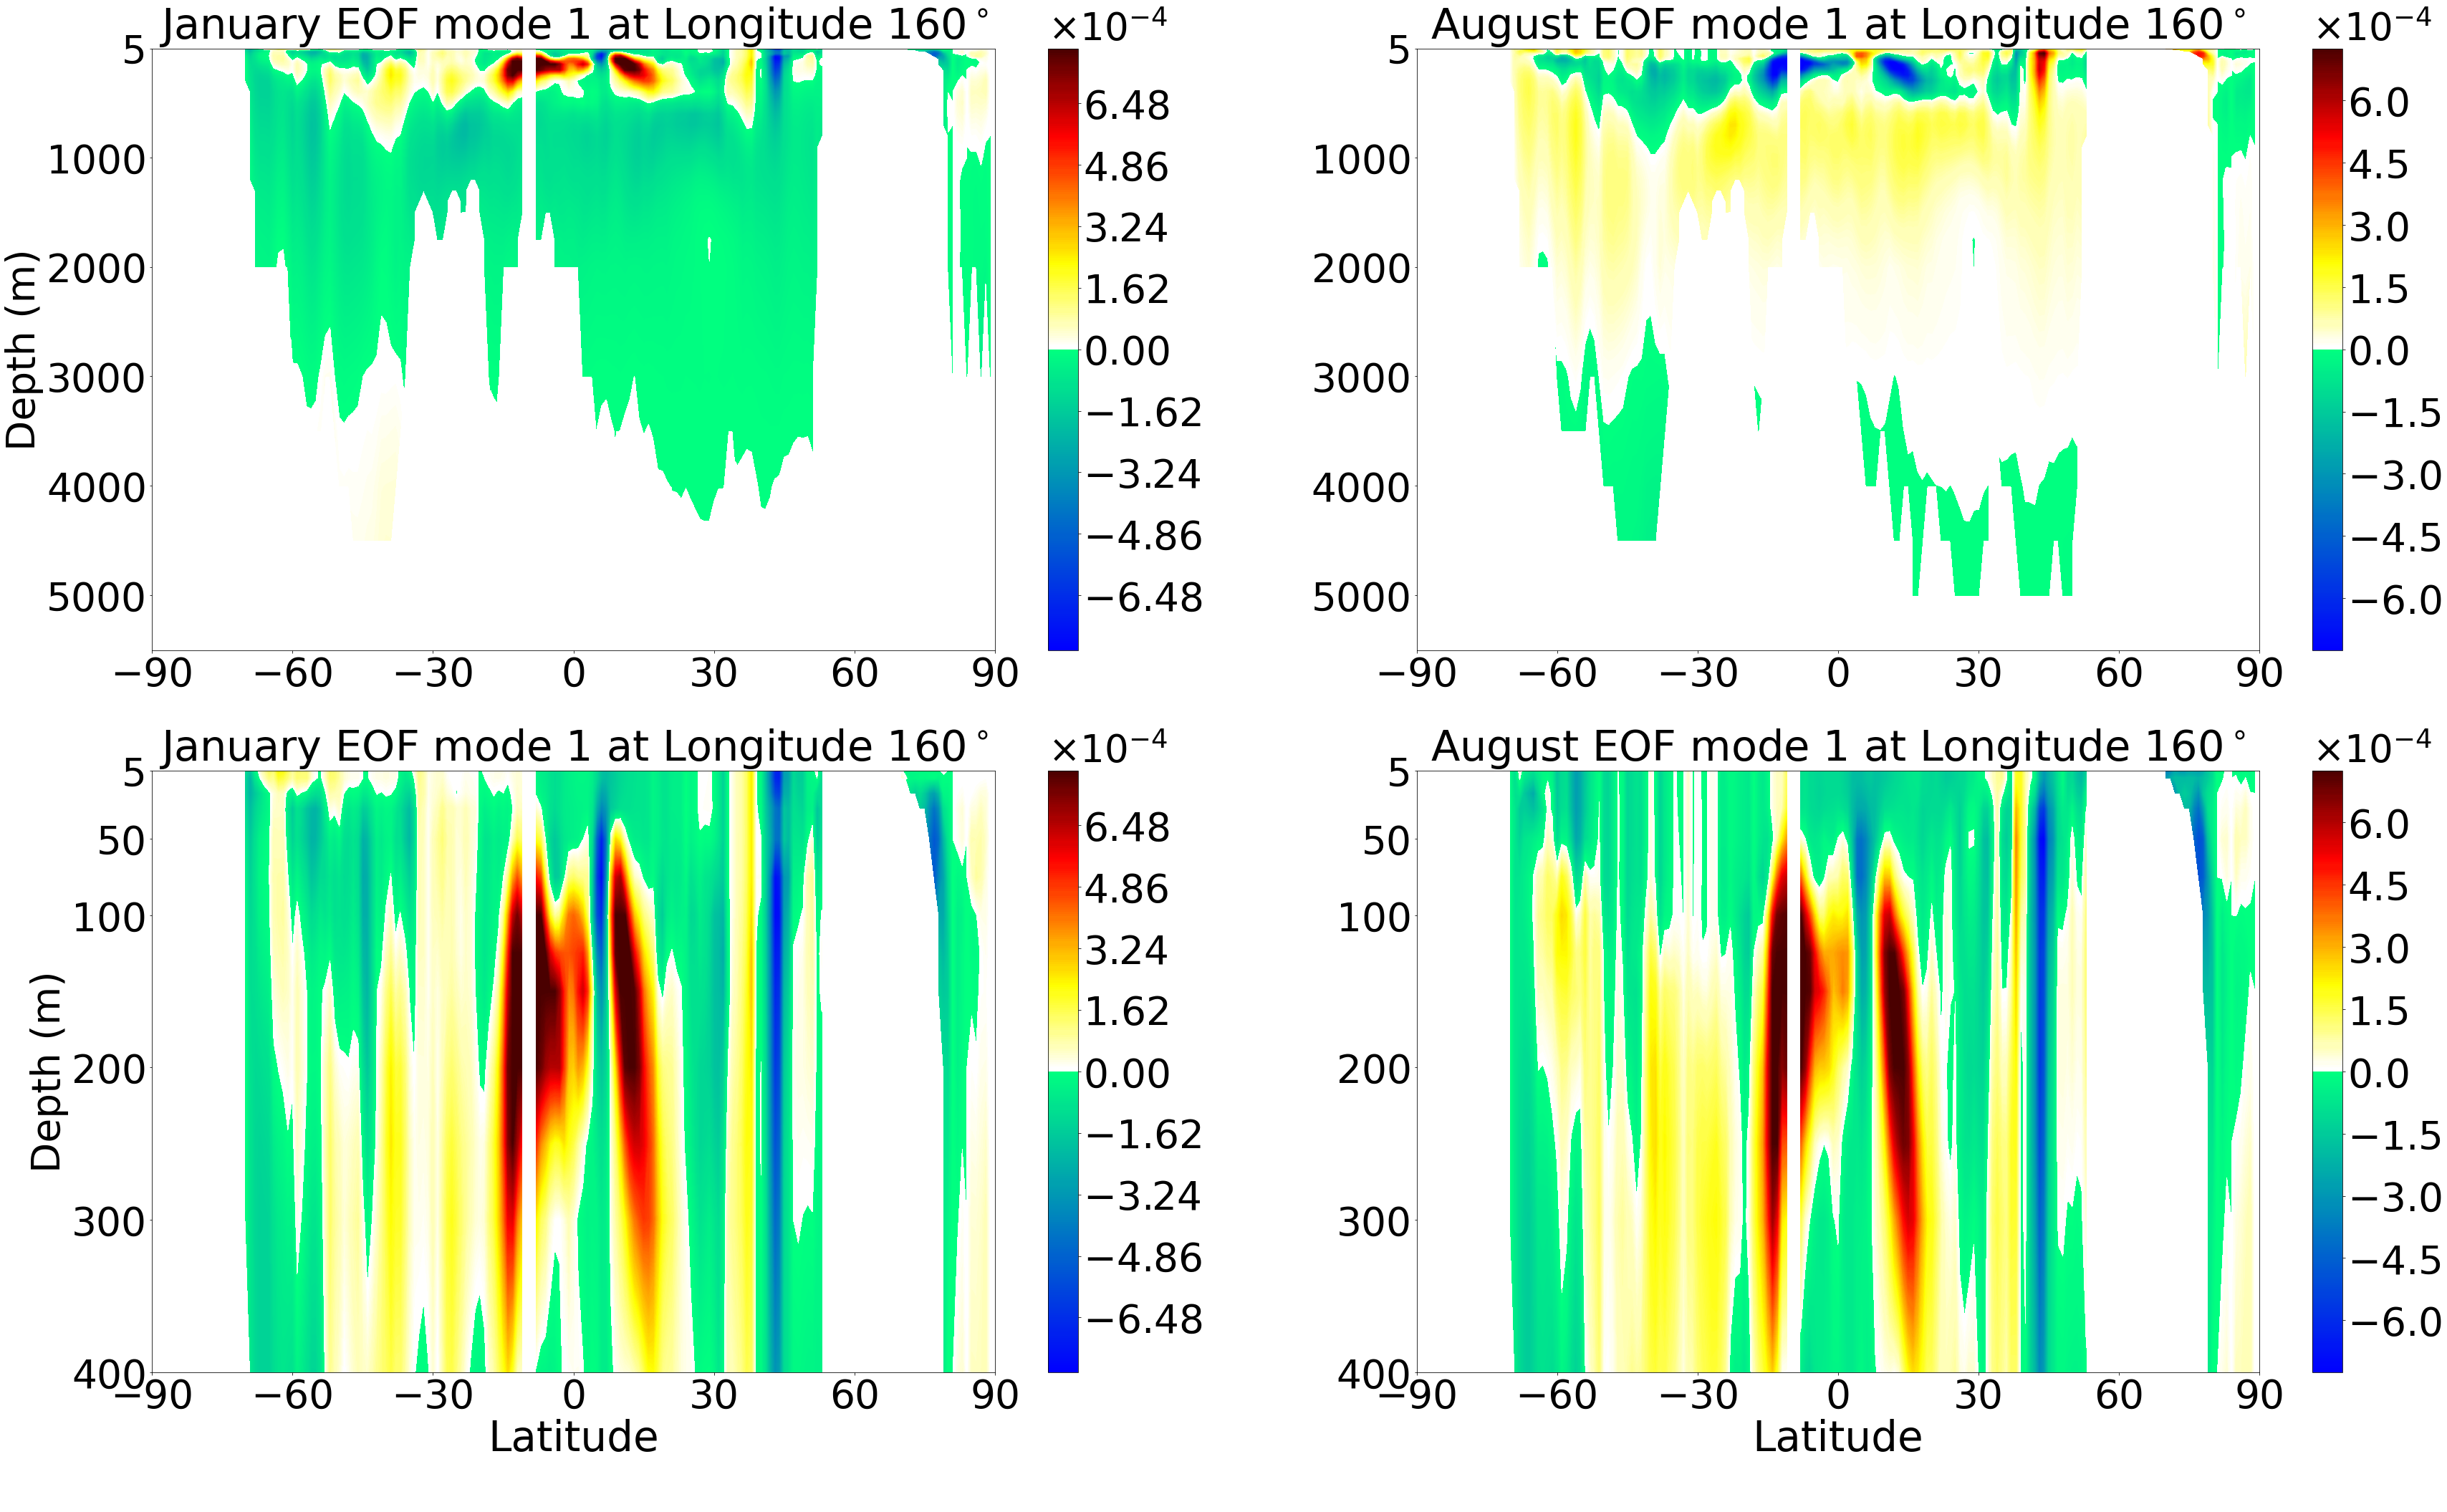

In [20]:
mode = 1

fig = plt.figure(figsize=(58.,34.))
title_sz = 59
label_sz =55
exp_sz = 53

#------------
# first row
# left
ax = fig.add_subplot(2,2,1)

Z = crosssec1[:, :, 160, mode-1] # take cross section at lon 160

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lats, 0-np.array(depths), surface, 300,cmap = newcmp2) # plot cross section

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('January EOF mode '+str(mode)+' at Longitude ' + str(math.floor(lons[160])) + '$^\circ$' , size = title_sz)


# labels formatting
plt.ylabel("Depth (m)", size = label_sz)
plt.yticks([-5, -1000, -2000, -3000, -4000, -5000], [5, 1000, 2000, 3000, 4000, 5000], fontsize = label_sz)
plt.xticks(np.linspace(-90, 90, 7),  fontsize = label_sz)


# right
# first plot
ax = fig.add_subplot(2,2,2)

Z = crosssec2[:, :, 160, mode-1]# take cross section at lon 160

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lats, 0-np.array(depths), surface, 300,cmap = newcmp2) # plot cross section

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('August EOF mode '+str(mode)+' at Longitude ' + str(math.floor(lons[160])) + '$^\circ$' , size = title_sz)


# labels formatting
plt.yticks([-5, -1000, -2000, -3000, -4000, -5000], [5, 1000, 2000, 3000, 4000, 5000], fontsize = label_sz)
plt.xticks(np.linspace(-90, 90, 7),  fontsize = label_sz)
#------------
# first row
# left
ax = fig.add_subplot(2,2,3)

Z = crosssec1[0:13, :, 160, mode-1] # take cross section at 160 only first 13 depths 

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lats, 0-np.array(depths[0:13]), surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('January EOF mode '+str(mode)+' at Longitude ' + str(math.floor(lons[160])) + '$^\circ$' , size = title_sz)

# labels formatting
plt.xlabel("Latitude\n", size =label_sz+3)
plt.ylabel("Depth (m)", size = label_sz)
plt.yticks([-5, -50, -100, -200, -300, -400], [5, 50, 100, 200, 300, 400],  fontsize = label_sz)
plt.xticks(np.linspace(-90, 90, 7),  fontsize = label_sz)


# right
# first plot
ax = fig.add_subplot(2,2,4)

Z = crosssec2[0:13, :, 160, mode-1]# take cross section at 160 only first 13 depths 

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lats, 0-np.array(depths[0:13]), -surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('August EOF mode '+str(mode)+' at Longitude ' + str(math.floor(lons[160])) + '$^\circ$' , size = title_sz)

# labels formatting
plt.xlabel("Latitude\n", size =label_sz+3)
plt.yticks([-5, -50, -100, -200, -300, -400], [5, 50, 100, 200, 300, 400], fontsize = label_sz)
plt.xticks(np.linspace(-90, 90, 7),  fontsize = label_sz)

plt.show()


### Figure 6

In [190]:
# Read in OGCM files
url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/OGCM/fig6a.csv' # URL for Jan 1993
file = pd.read_csv(url,header = None) # Read in url
jan1993 = np.array(file) # Turn file into array
jan1993  = jan1993.squeeze() # remove uncesessary dim

url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/OGCM/fig6b.csv'# URL for Jan 2003
file = pd.read_csv(url,header = None) # Read in url
jan2003 = np.array(file) # Turn file into array
jan2003  = jan2003.squeeze() # remove uncesessary dim

url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/OGCM/fig6c.csv'# URL for Aug 199
file = pd.read_csv(url,header = None) # Read in url
aug1990 = np.array(file) # Turn file into array
aug1990  = aug1990.squeeze() # remove uncesessary dim

url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/OGCM/fig6d.csv'# URL for Aug 2003
file = pd.read_csv(url,header = None) # Read in url
aug2003 = np.array(file) # Turn file into array
aug2003 = aug2003.squeeze() # remove uncesessary dim

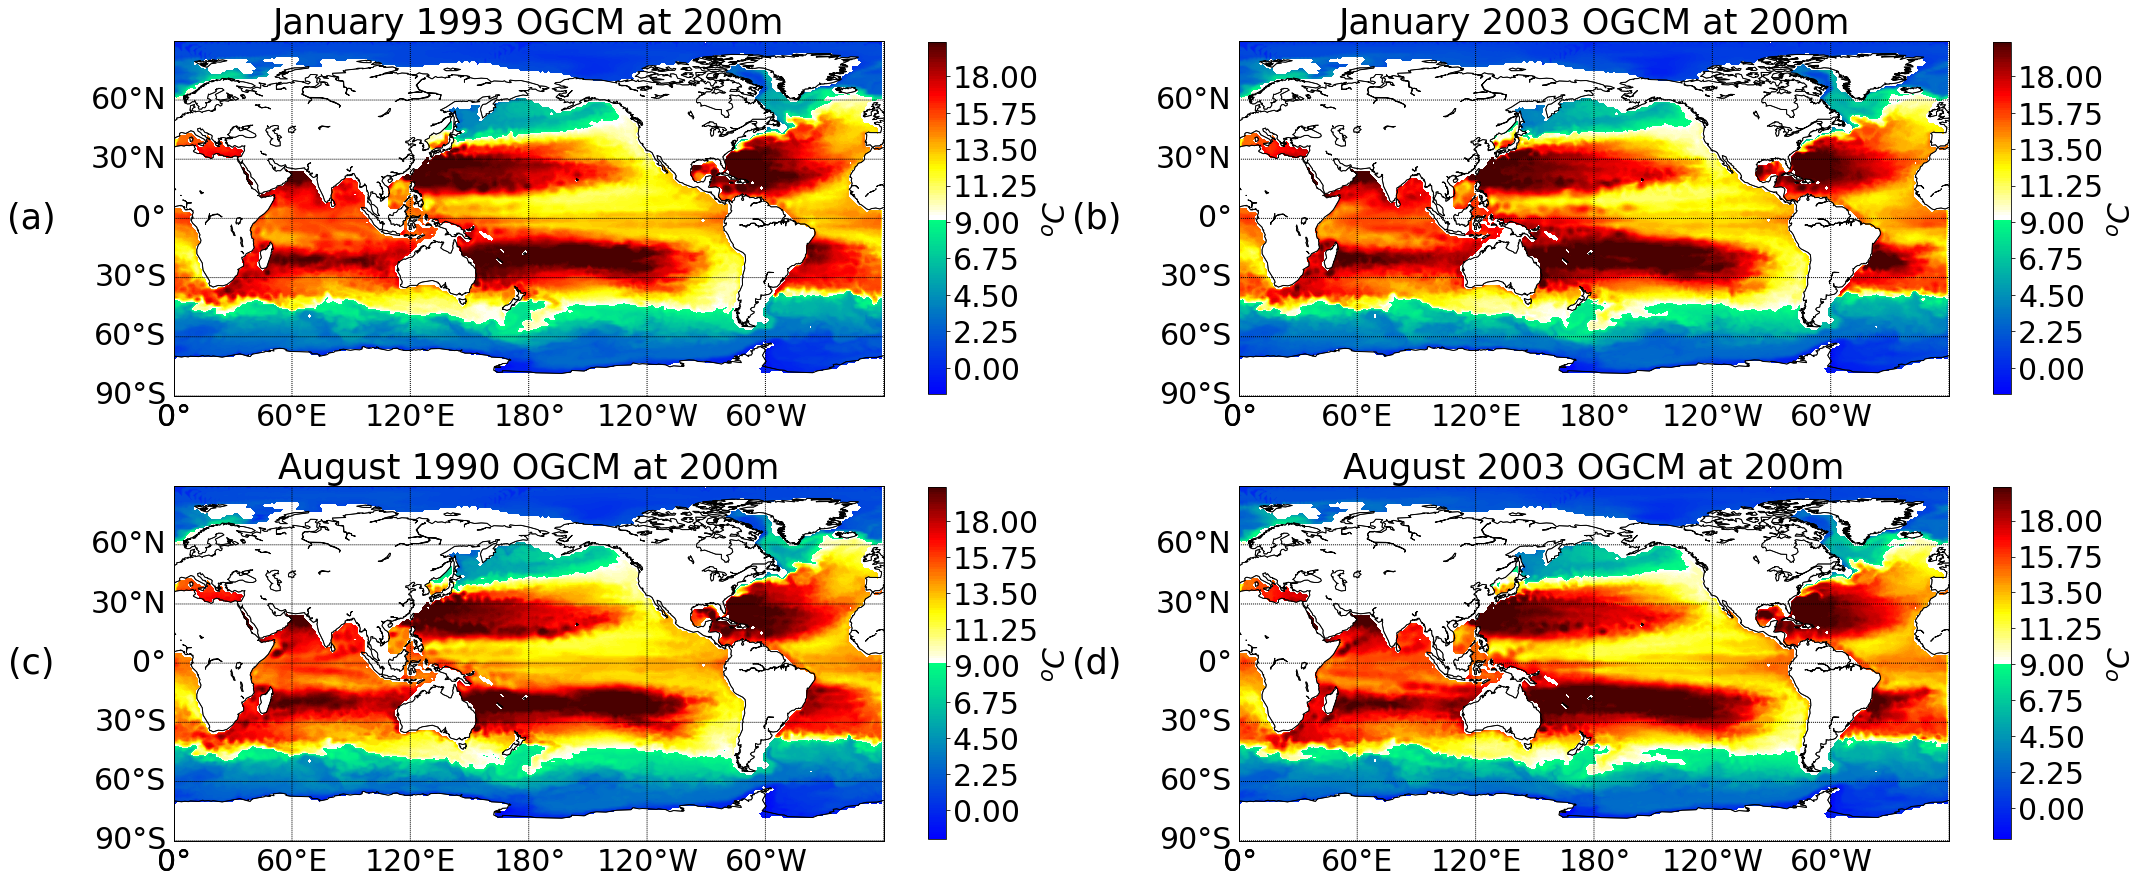

In [206]:
#Plot OGCM
fig = plt.figure(figsize=(35.,15.))
title_sz = 35
label_sz = 30
sh = .95

x = linspace(0, 360-1, 360)  # lon ponts
y = linspace(-90, 90-1, 180) # lat points
xx, yy = meshgrid(x, y) # make matricies with lat lon points

depth_ind = 9
depth = depths[depth_ind]
#-------------------------------
# First row
# left
ax = fig.add_subplot(2,2,1)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0) # Create map 

Z = np.reshape(jan1993[depth_ind *64800: (depth_ind+1) *64800],(360,180)).T # OGCM matrix with specific depth

clip = 20 # min and max limit
temp = np.maximum(np.minimum(Z, clip), -clip) # clip OGCM values
    
mymap.drawcoastlines(color='black', linewidth=.6) # draw castlines
mymap.drawmapboundary()

plt.contourf(xx, yy, temp, 200 ,cmap = newcmp2) # plot temps

plt.title('January 1993 OGCM at ' + str(depth) + "m",fontsize = title_sz)

plt.ylabel('(a)', rotation = 'horizontal', size = 35)
ax.yaxis.set_label_coords(-0.2, 0.45) # set placement of label

mymap.drawcoastlines()
mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lat lines and labels
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz) # draw lon lines and labels

cbar = plt.colorbar(shrink = sh)          # fit colorbar to map size
cbar.ax.tick_params(labelsize=label_sz)   # set tick length
cbar.ax.set_ylabel('$^{o}C$', size=label_sz) # set colorbar label
cbar.update_ticks()

#-------------------------------
# First row
# right
ax = fig.add_subplot(2,2,2)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0) # Create map 

Z = np.reshape(jan2003[depth_ind *64800: (depth_ind+1) *64800],(360,180)).T # OGCM matrix with specific depth

clip = 20 # min and max limit
temp = np.maximum(np.minimum(Z, clip), -clip) # clip OGCM values
    
mymap.drawcoastlines(color='black', linewidth=.6) # draw castlines
mymap.drawmapboundary()

plt.contourf(xx, yy, temp, 200 ,cmap = newcmp2) # plot temps

plt.title('January 2003 OGCM at ' + str(depth) + "m",fontsize = title_sz)


plt.ylabel('(b)', rotation = 'horizontal', size = 35)
ax.yaxis.set_label_coords(-0.2, 0.45) # set placement of label

mymap.drawcoastlines()
mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lat lines and labels
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz) # draw lon lines and labels

cbar = plt.colorbar(shrink = sh)          # fit colorbar to map size
cbar.ax.tick_params(labelsize=label_sz)   # set tick length
cbar.ax.set_ylabel('$^{o}C$', size=label_sz) # set colorbar label
cbar.update_ticks()
#-------------------------------
# First row
# right
ax = fig.add_subplot(2,2,3)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0) # Create map 


Z = np.reshape(aug1990[depth_ind *64800: (depth_ind+1) *64800],(360,180)).T # OGCM matrix with specific depth

clip = 20 # min and max limit
temp = np.maximum(np.minimum(Z, clip), -clip) # clip OGCM values
    
mymap.drawcoastlines(color='black', linewidth=.6) # draw castlines
mymap.drawmapboundary()

plt.contourf(xx, yy, temp, 200 ,cmap = newcmp2) # plot temps

plt.title('August 1990 OGCM at ' + str(depth) + "m",fontsize = title_sz)


plt.ylabel('(c)', rotation = 'horizontal', size = 35)
ax.yaxis.set_label_coords(-0.2, 0.45) # set placement of label

mymap.drawcoastlines()
mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lat lines and labels
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz) # draw lon lines and labels

cbar = plt.colorbar(shrink = sh)          # fit colorbar to map size
cbar.ax.tick_params(labelsize=label_sz)   # set tick length
cbar.ax.set_ylabel('$^{o}C$', size=label_sz) # set colorbar label
cbar.update_ticks()
#-------------------------------
# First row
# right
ax = fig.add_subplot(2,2,4)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0) # Create map 

Z = np.reshape(aug2003[depth_ind *64800: (depth_ind+1) *64800],(360,180)).T # OGCM matrix with specific depth

clip = 20 # min and max limit
temp = np.maximum(np.minimum(Z, clip), -clip) # clip OGCM values
    
mymap.drawcoastlines(color='black', linewidth=.6) # draw castlines
mymap.drawmapboundary()

plt.contourf(xx, yy, temp, 200 ,cmap = newcmp2) # plot temps
plt.title('August 2003 OGCM at ' + str(depth) + "m",fontsize = title_sz)


plt.ylabel('(d)', rotation = 'horizontal', size = 35)
ax.yaxis.set_label_coords(-0.2, 0.45) # set placement of label

mymap.drawcoastlines()
mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lat lines and labels
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz) # draw lon lines and labels

cbar = plt.colorbar(shrink = sh)          # fit colorbar to map size
cbar.ax.tick_params(labelsize=label_sz)   # set tick length
cbar.ax.set_ylabel('$^{o}C$', size=label_sz) # set colorbar label
cbar.update_ticks()

plt.show()


### Figure 7

In [21]:
lons = np.linspace(0,360-1,360) 
lats = np.linspace(-90, 90-1, 180)
yz,zy = np.meshgrid(lats, depths)
xz,zx = np.meshgrid(lons, depths)

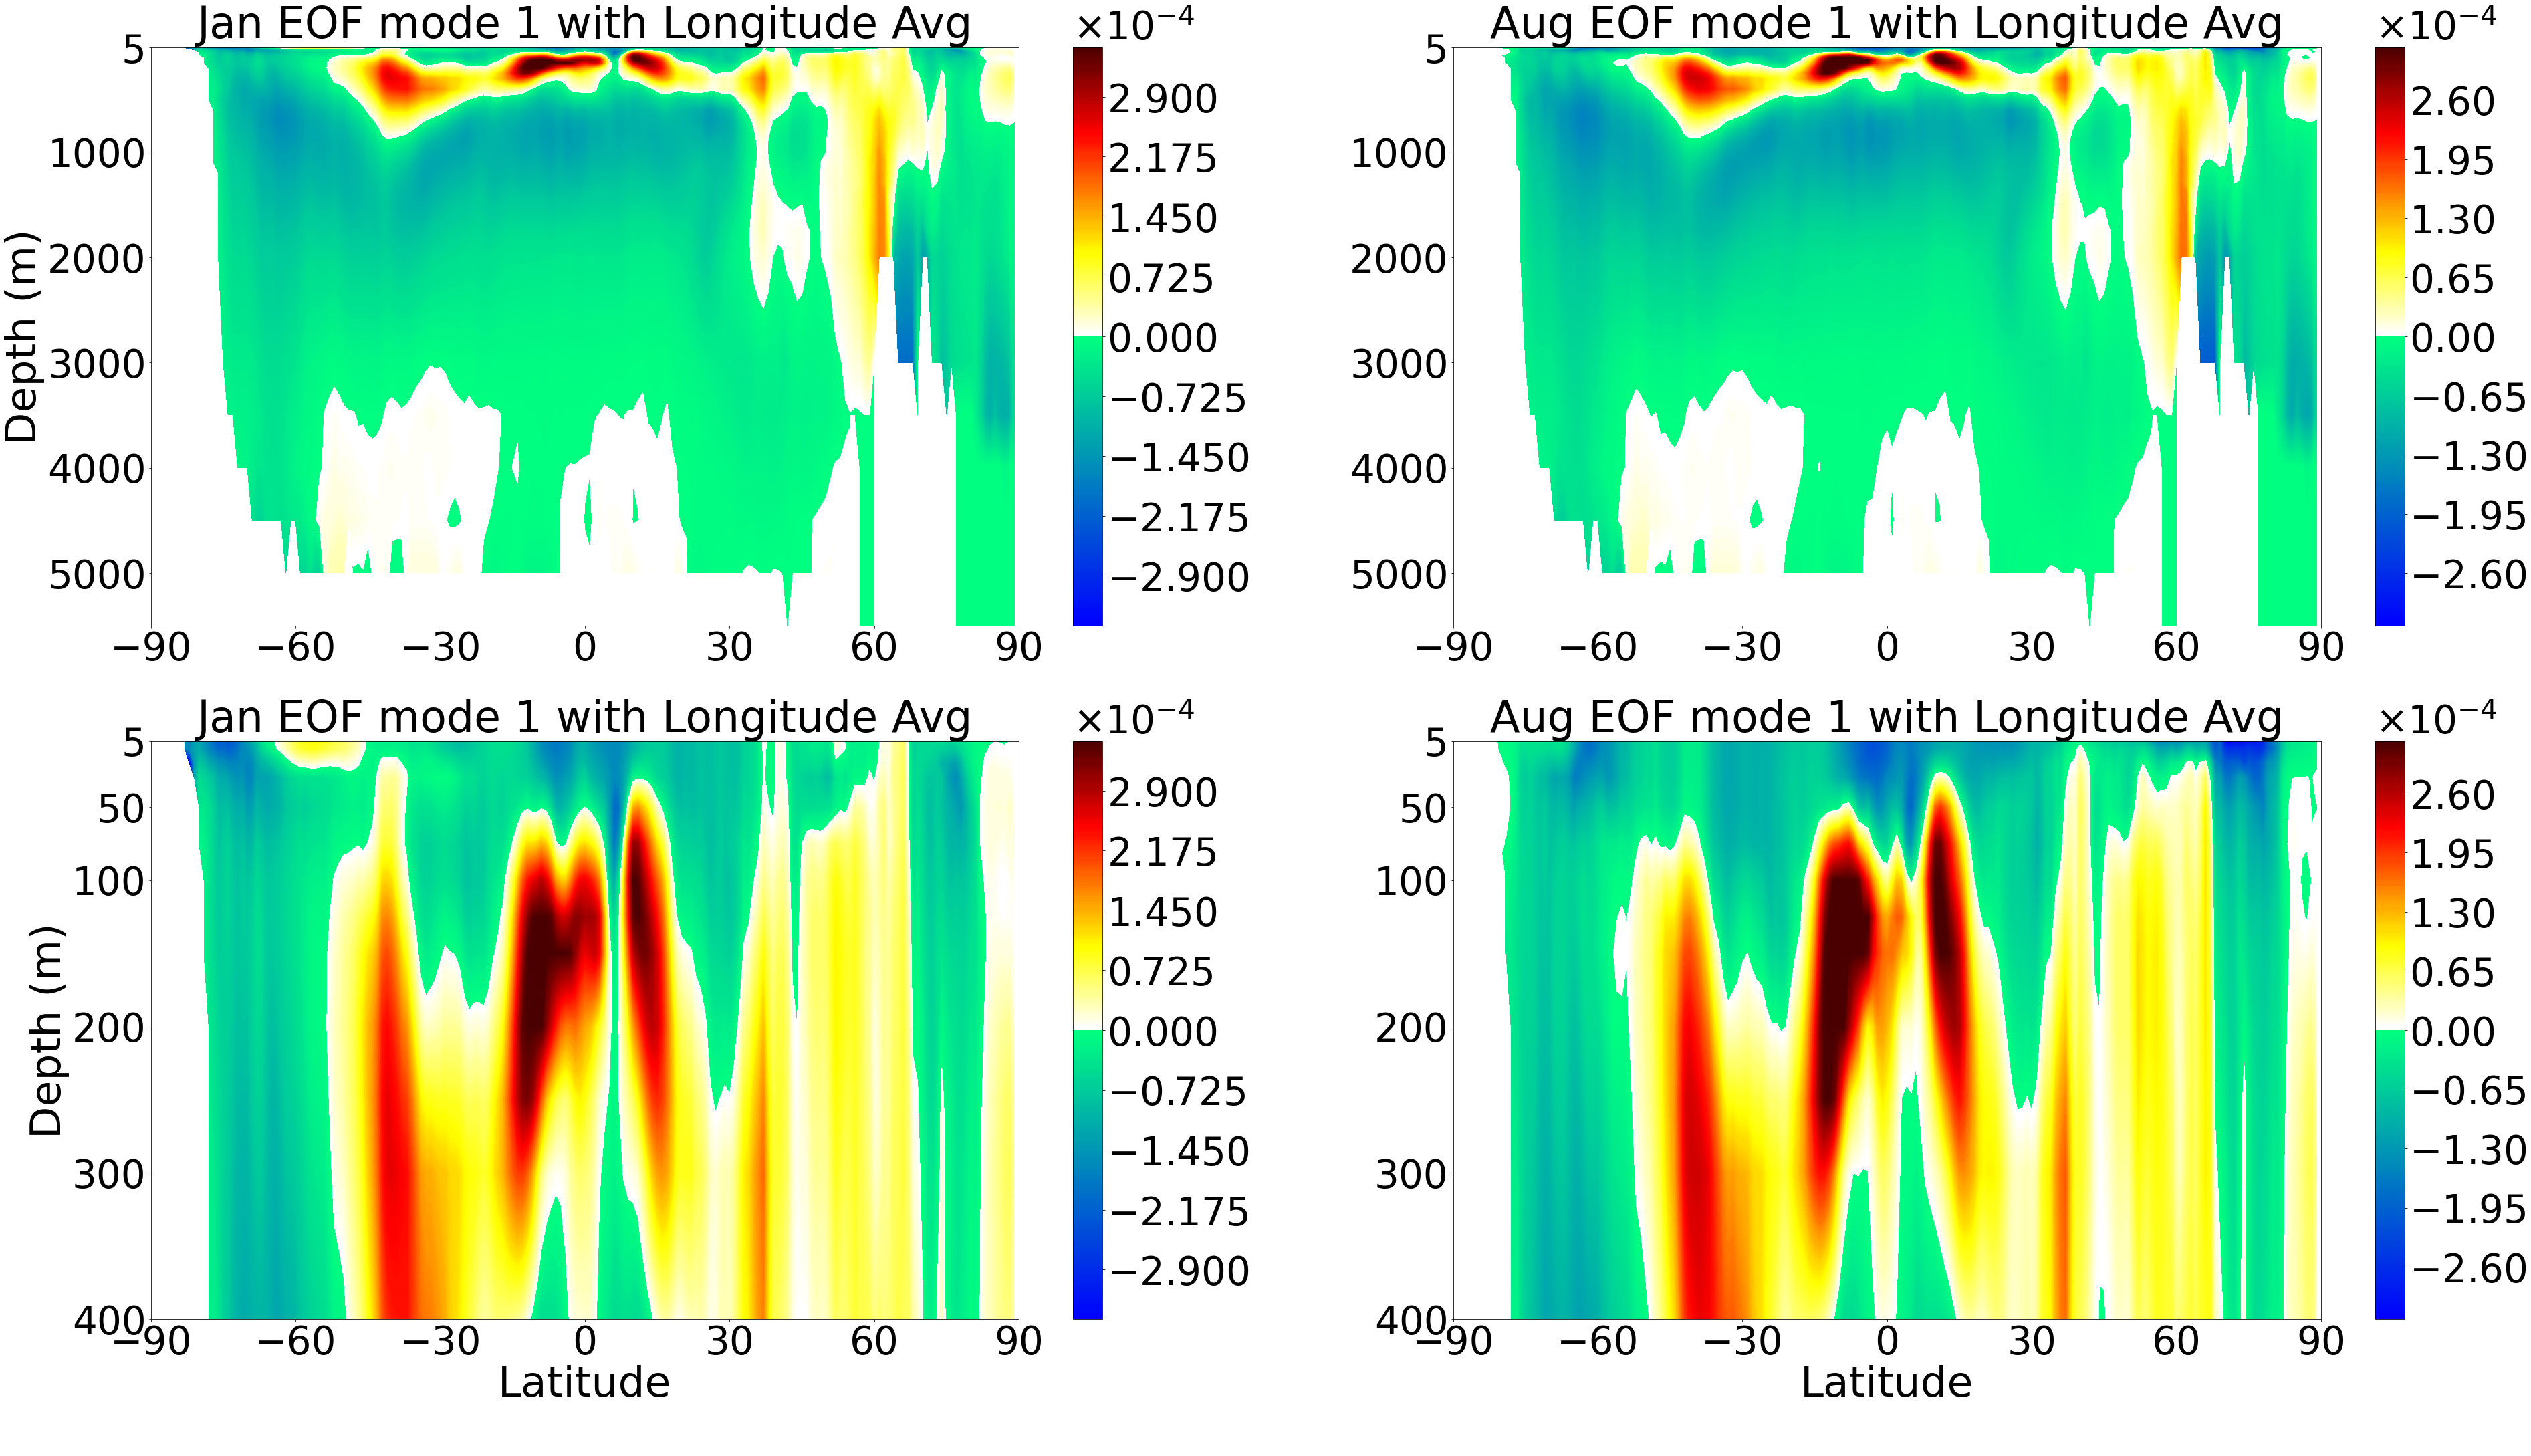

In [22]:
mode = 1

fig = plt.figure(figsize=(64.,35.))
title_sz = 65
label_sz =58
exp_sz = 58

#------------
# first row
# left
ax = fig.add_subplot(2,2,1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    Z = np.nanmean(crosssec1[:,:,:,mode-1], axis = 2) # longitude avg

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lats, 0-np.array(depths), surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('Jan EOF mode '+str(mode)+' with Longitude Avg' , size = title_sz)

# label format
plt.ylabel("Depth (m)", size = label_sz+5)
plt.yticks([-5, -1000, -2000, -3000, -4000, -5000], [5, 1000, 2000, 3000, 4000, 5000], fontsize = label_sz)
plt.xticks(np.linspace(-90, 90, 7),  fontsize = label_sz)

#------------
# First row
# right
ax = fig.add_subplot(2,2,2)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    Z = np.nanmean(crosssec2[:,:,:,mode-1], axis = 2) # longitude avg

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lats, 0-np.array(depths), -surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('Aug EOF mode '+str(mode)+' with Longitude Avg' , size = title_sz)

# label format
plt.yticks([-5, -1000, -2000, -3000, -4000, -5000], [5, 1000, 2000, 3000, 4000, 5000], fontsize = label_sz)
plt.xticks(np.linspace(-90, 90, 7),  fontsize = label_sz)

#------------
# Sec row
# left
ax = fig.add_subplot(2,2,3)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    foo = np.nanmean(crosssec1[:,:,:,mode-1], axis = 2) # longitude avg
Z = foo[0:13,:] # Only first 13 depths

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lats, 0-np.array(depths[0:13]), surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('Jan EOF mode '+str(mode)+' with Longitude Avg' , size = title_sz)

# label format
plt.xlabel("Latitude\n", size =label_sz+5)
plt.ylabel("Depth (m)", size = label_sz+5)
plt.yticks([-5, -50, -100, -200, -300, -400], [5, 50, 100, 200, 300, 400],  fontsize = label_sz)
plt.xticks(np.linspace(-90, 90, 7),  fontsize = label_sz)

#------------
# Sec row
# right
ax = fig.add_subplot(2,2,4)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    foo = np.nanmean(crosssec2[:,:,:,mode-1], axis = 2) # longitude avg
Z = foo[0:13,:] # Only first 13 depths

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lats, 0-np.array(depths[0:13]), -surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('Aug EOF mode '+str(mode)+' with Longitude Avg' , size = title_sz)

# label format
plt.xlabel("Latitude\n", size =label_sz+5)
plt.yticks([-5, -50, -100, -200, -300, -400], [5, 50, 100, 200, 300, 400], fontsize = label_sz)
plt.xticks(np.linspace(-90, 90, 7),  fontsize = label_sz)


plt.show()

### Figure 8

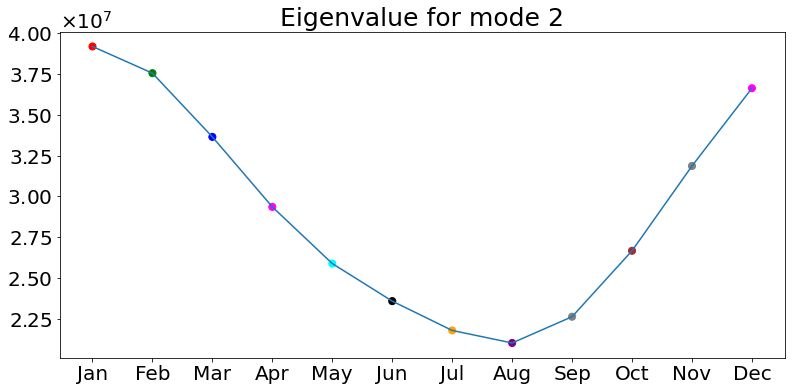

In [24]:
# plotting evals for the first mode
plt.figure(figsize=(13.,6.)) # fig size
title_sz = 25
label_sz = 20
mode =  2 # plot 2nd Mode

colors = np.array(["red","green","blue","magenta","cyan","black","orange","purple","grey","brown","gray","magenta"]) # point colors
time = np.arange(1,13) # plotting 12 points
plt.scatter(time, evals[:,mode -1], c = colors, s =50) # plot evals as points
plt.plot(time, evals[:,mode -1]) # connect each moint

# axis labels
plt.title('Eigenvalue for mode '+ str(mode), fontsize = title_sz) 
plt.xticks(time, months , fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ticklabel_format(useMathText=True, axis='y', scilimits=(0,0)) # format y axis to scientific notation

# set size of exponent
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(label_sz)

plt.show()

### Figure 9

In [25]:
## Plot EOF
x = linspace(0, 360-1, 360)
y = linspace(-90, 90-1, 180)

xx, yy = meshgrid(x, y)

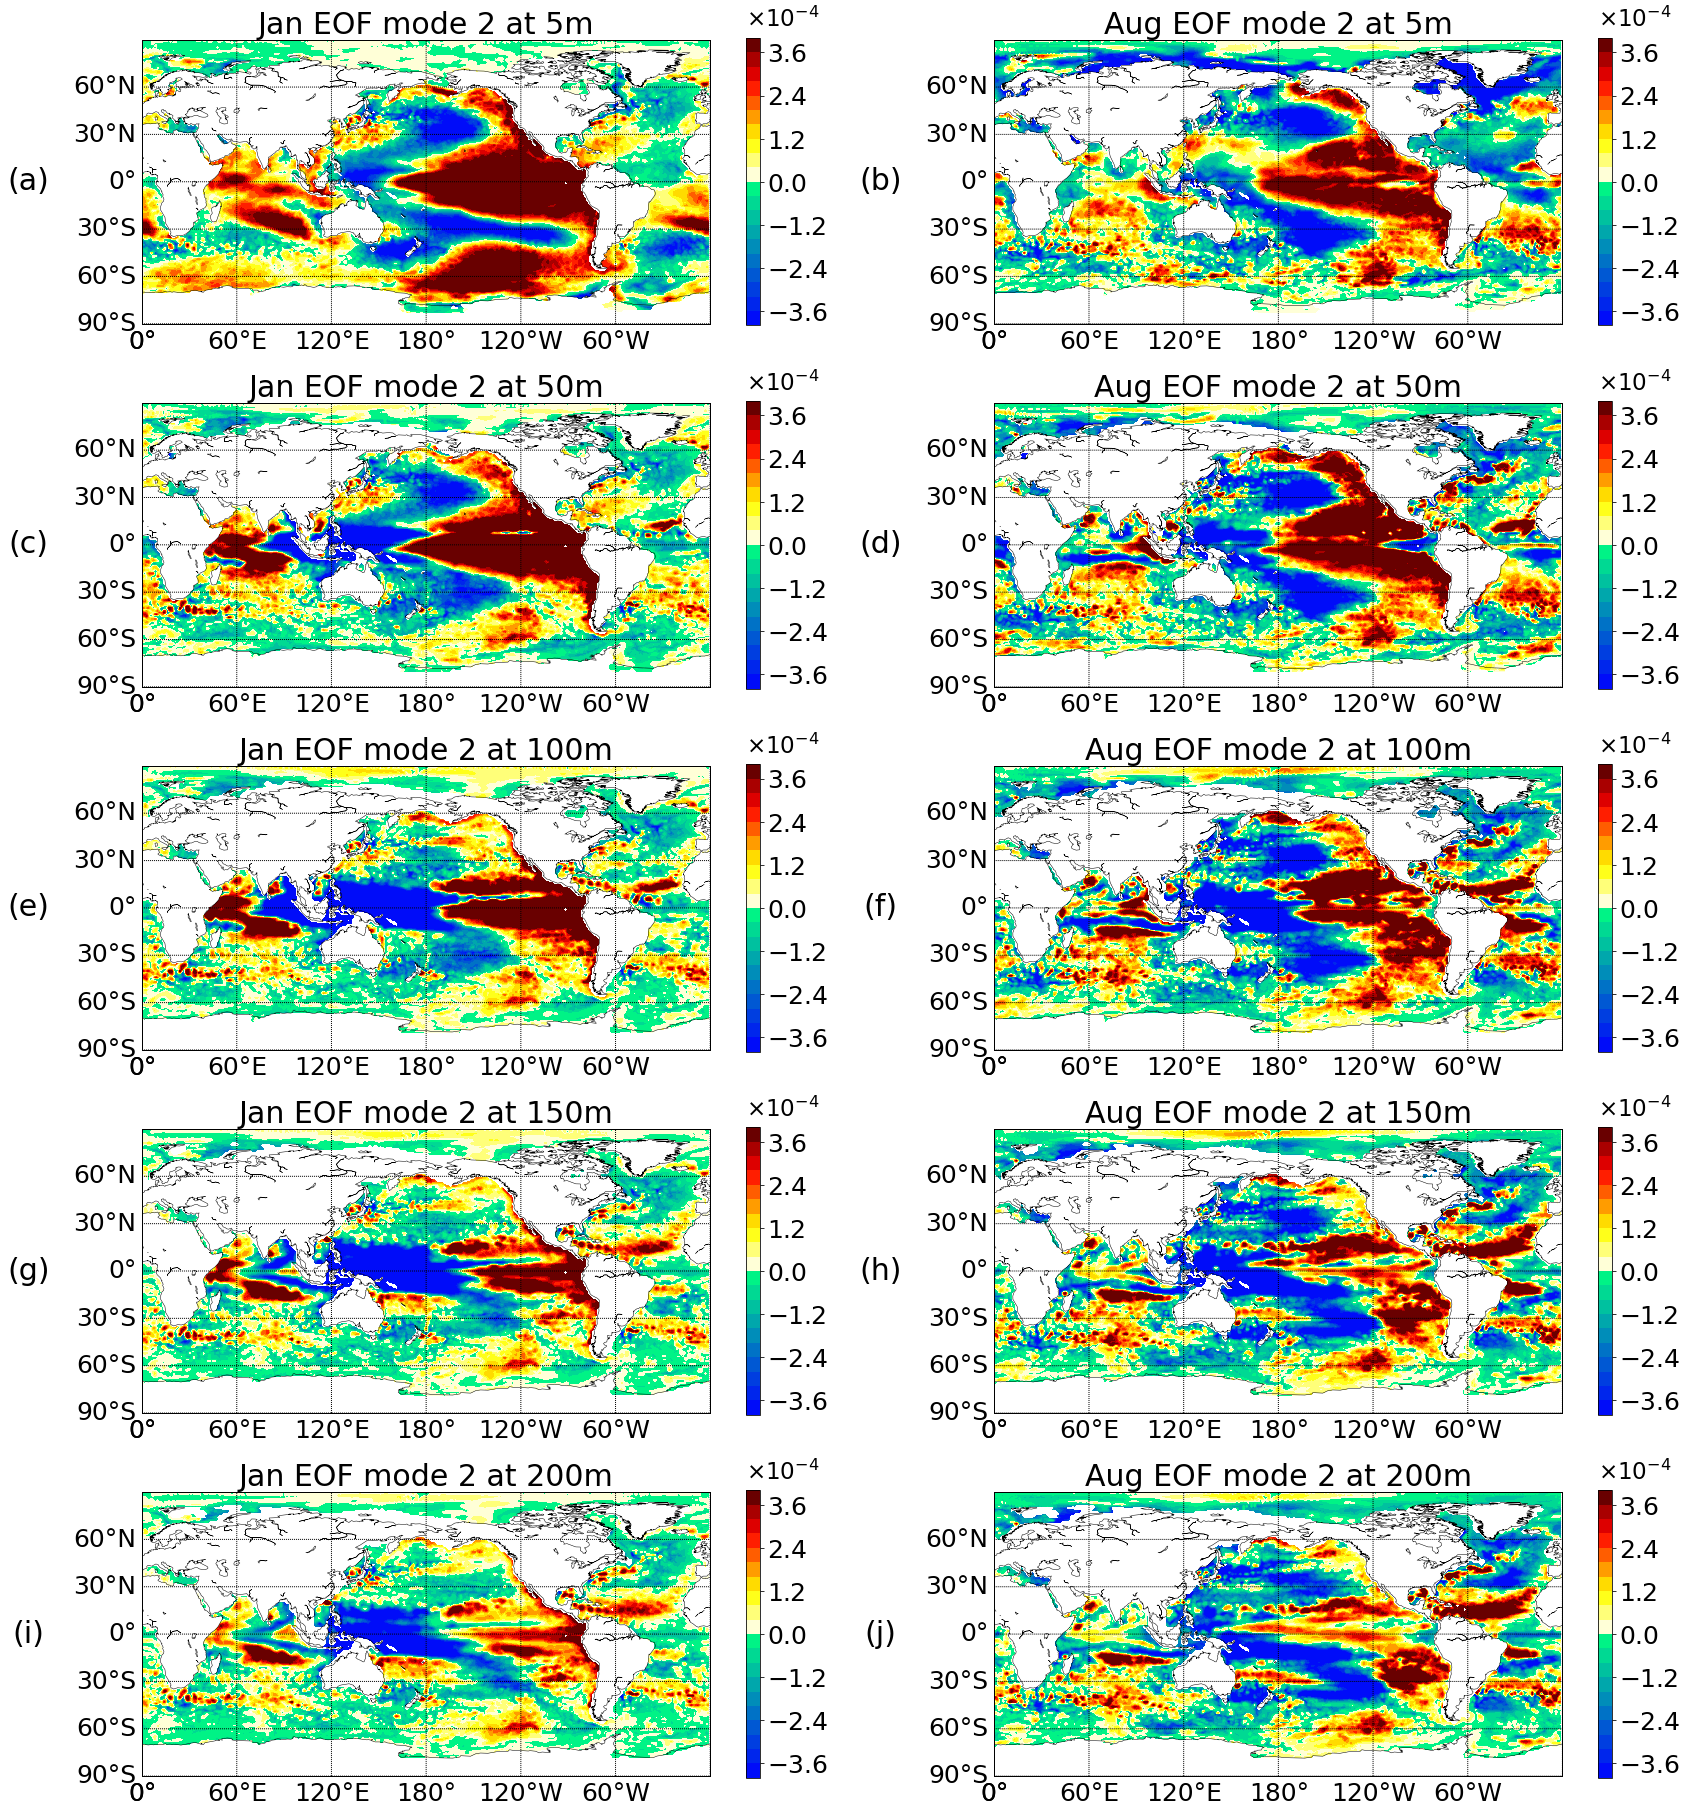

In [26]:
mode = 2 # plotting 2nd mode

fig = plt.figure(figsize=(28.,59.))
title_sz = 30
label_sz = 25
exp_sz = 23

#-------------------------------
# First row
# left
ax = fig.add_subplot(9,2,1)

depth_ind = 0 # define depth
depth = depths[depth_ind] # depth name

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0) # plot map 

EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360)) # matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2)   # plot EOF

mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines in black
mymap.drawmapboundary()

plt.ylabel('(a)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45)

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

#-------------------------------
# First row
# right
ax = fig.add_subplot(9,2,2)


mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2) # plot EOFs

mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines in black
mymap.drawmapboundary()


plt.ylabel('(b)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label 

plt.title('Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# Second row
# left
ax = fig.add_subplot(9,2,3)

depth_ind = 4
depth = depths[depth_ind]

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)

EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2) # plot EOFs

mymap.drawcoastlines(color='black', linewidth=.5)# draw coastlines in black
mymap.drawmapboundary()

plt.ylabel('(c)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label 

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

#-------------------------------
# Second row
# right
ax = fig.add_subplot(9,2,4)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)

EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2)  # plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()

plt.ylabel('(d)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label 

plt.title('Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# third row
# left
ax = fig.add_subplot(9,2,5)

depth_ind = 6

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)

depth = depths[depth_ind]


EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2) # plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()

plt.ylabel('(e)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# third row
# right
ax = fig.add_subplot(9,2,6)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)

EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()


plt.ylabel('(f)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title( 'Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# fourth row
# left
ax = fig.add_subplot(9,2,7)

depth_ind = 8
depth = depths[depth_ind]

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values


mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()


plt.ylabel('(g)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# fourth row
# right
ax = fig.add_subplot(9,2,8)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()


plt.ylabel('(h)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# fifth row
# left
ax = fig.add_subplot(9,2,9)

depth_ind = 9
depth = depths[depth_ind]

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF1[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()

plt.ylabel('(i)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Jan EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()

# -------------------------------
# fifth row
# right
ax = fig.add_subplot(9,2,10)

mymap = Basemap(projection='cyl', lon_0 = 180, lat_0 = 0)


EOF = np.reshape(EOF2[depth_ind *64800: (depth_ind+1) *64800, mode-1],(180,360))# matrix of EOF with specified depth
clip = .0004 # set min and max values
EOF = np.maximum(np.minimum(EOF, clip), -clip) # climp min and max values

mymap.contourf(xx, yy, -EOF, 25, cmap = newcmp2)# plot EOFs
mymap.drawcoastlines(color='black', linewidth=.5) # draw coastlines
mymap.drawmapboundary()


plt.ylabel('(j)', rotation = 'horizontal', size = 30)
ax.yaxis.set_label_coords(-0.2, 0.45) # center left label

plt.title('Aug EOF mode '+ str(mode) + ' at ' + str(depth) + 'm', fontsize=title_sz)

mymap.drawparallels(np.arange(-90,90,30), labels = [1,0,0,0],fontsize = label_sz) # draw lines and labels for latitudes
mymap.drawmeridians(np.arange(-180,180,60), labels = [0,0,0,1],fontsize= label_sz)# draw lines and labels for lomgitudes

cbar = plt.colorbar(shrink = .95, format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # make colorbar fit size of graph
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11           # moving exponent so it doesnt overlap with top of colorbar
cbar.ax.yaxis.set_offset_position('left')  # setexponent so it is more left 
cbar.ax.tick_params(labelsize=label_sz)    # set label size of ticks
cbar.formatter.set_powerlimits((0, 0))     # formatting scientific notation
cbar.update_ticks()


plt.show()

### Figure 10

In [ ]:
lons = np.linspace(0,360-1,360)
lats = np.linspace(-90, 90-1, 180)
yz,zy = np.meshgrid(lats, depths)
xz,zx = np.meshgrid(lons, depths)

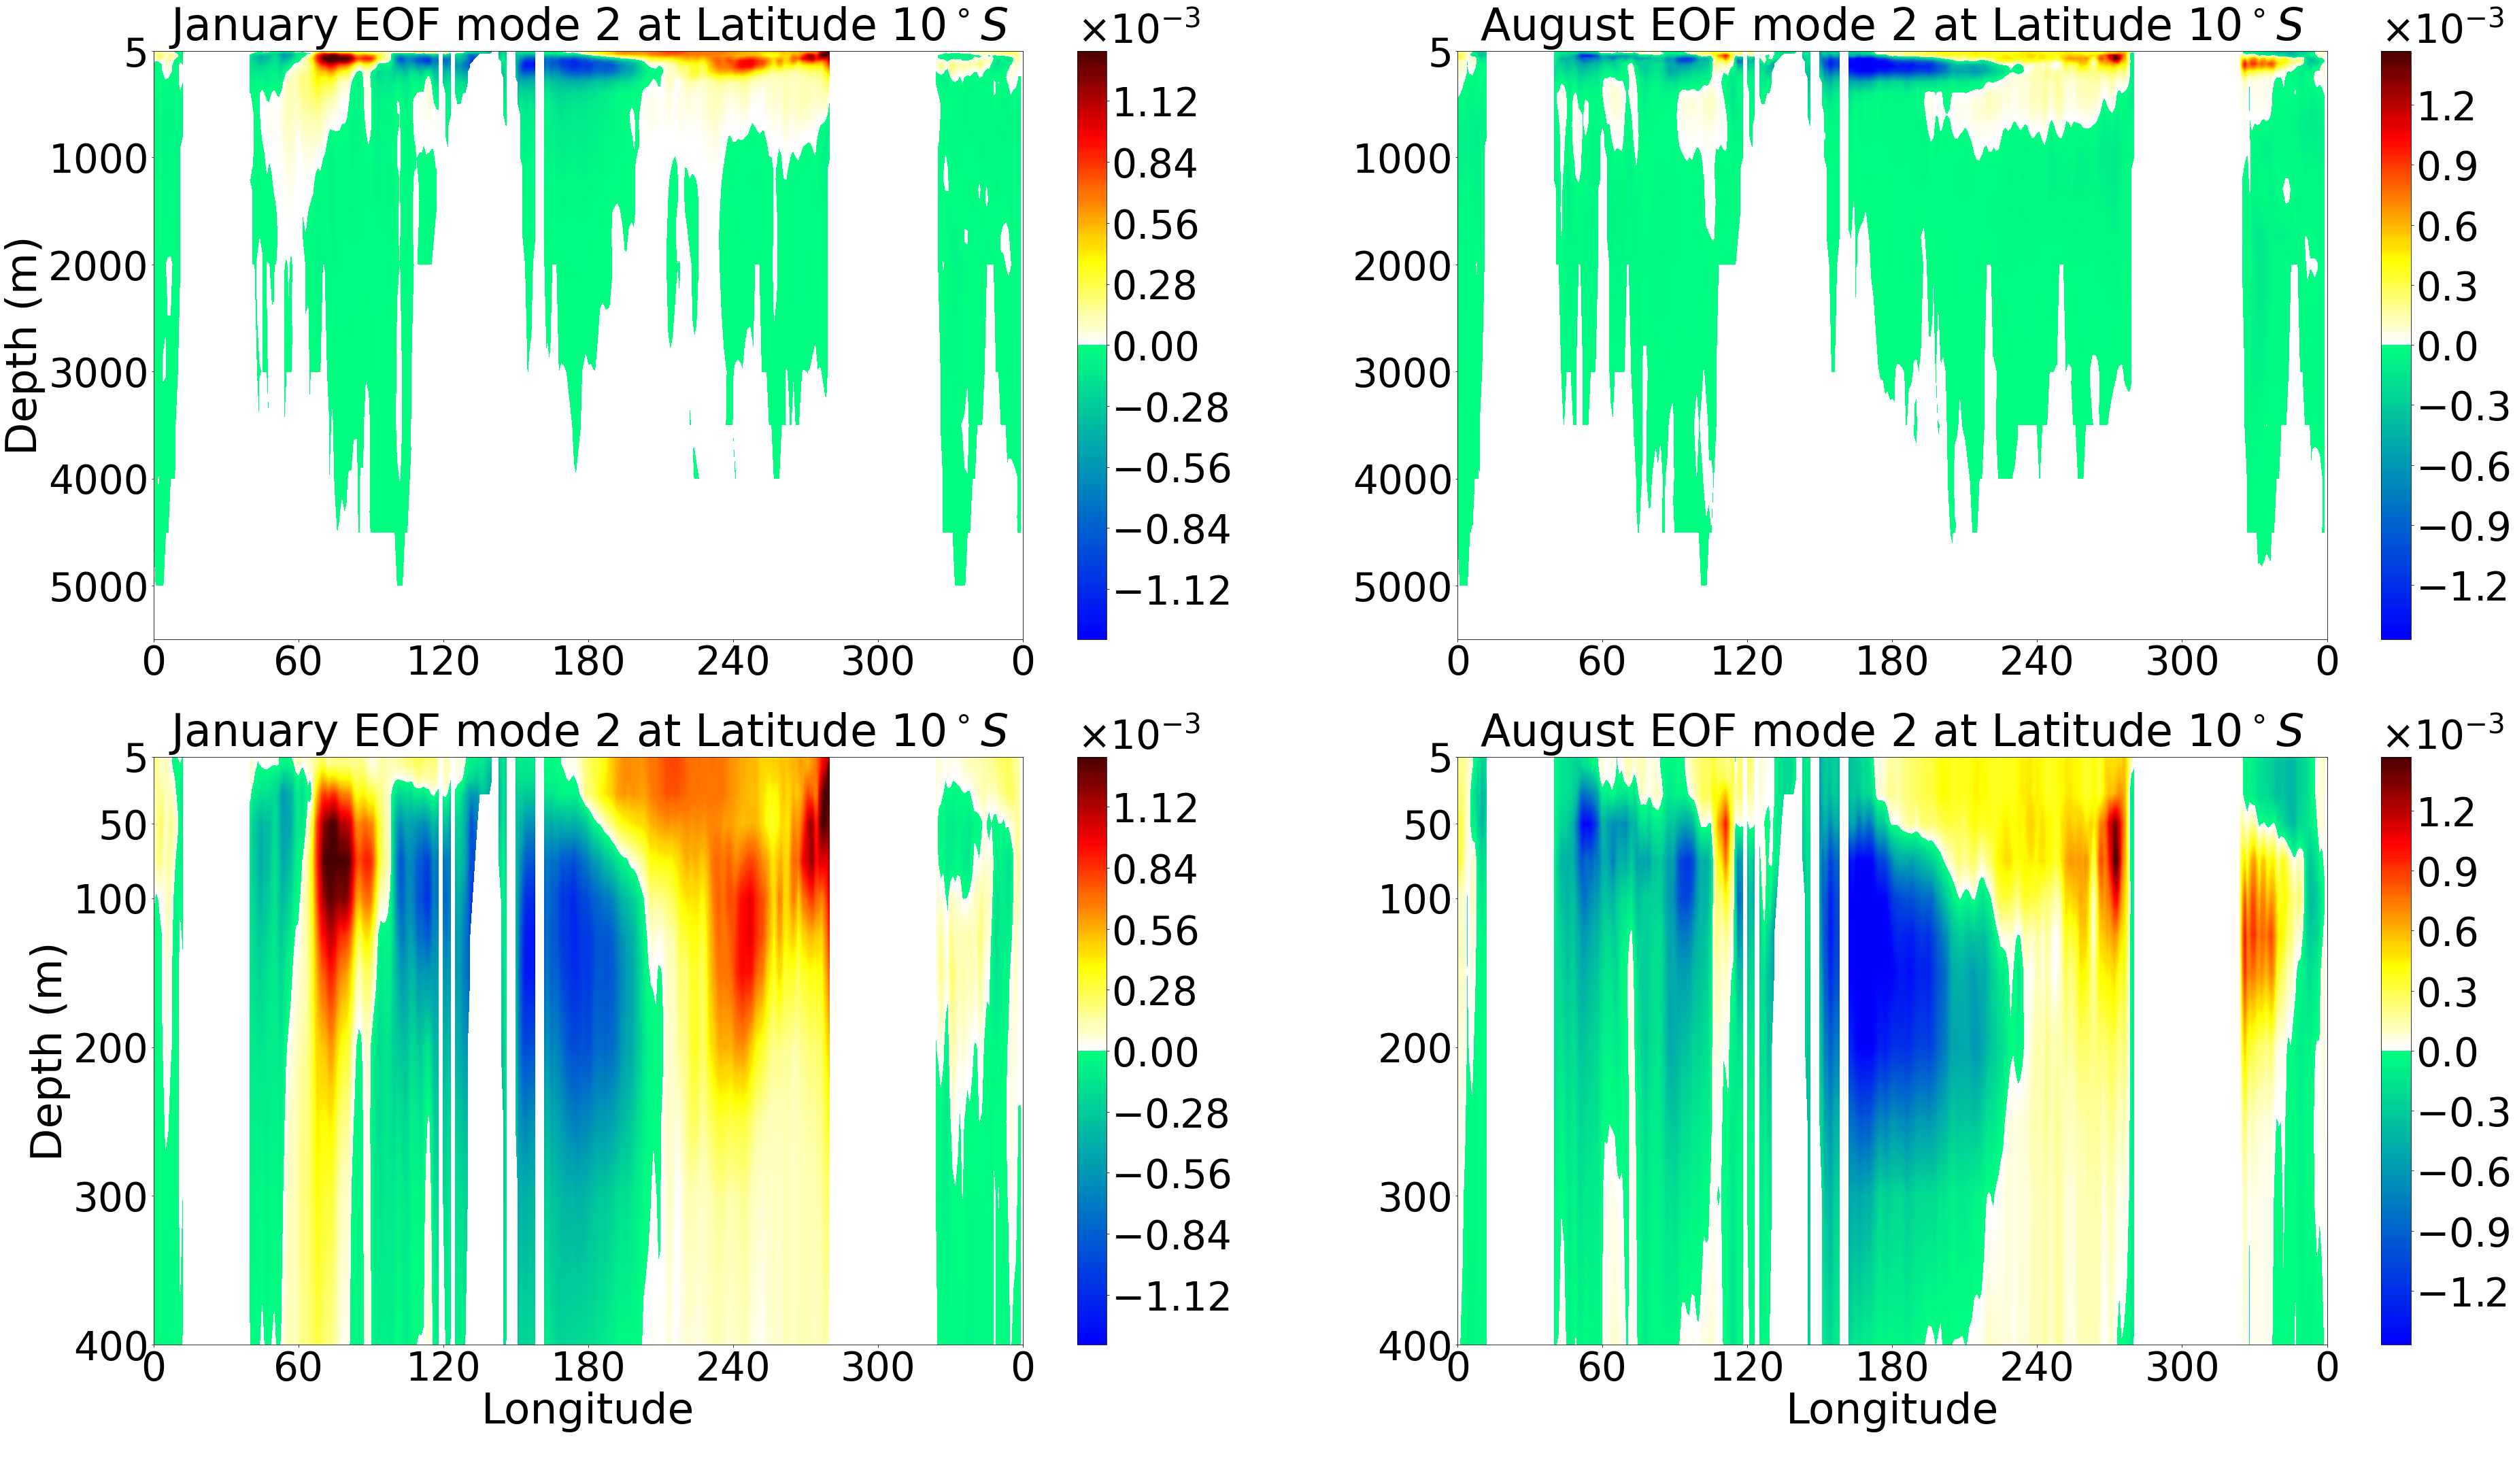

In [27]:
mode = 2

fig = plt.figure(figsize=(63.,35.))
title_sz = 65
label_sz =58
exp_sz = 58

#------------
# first row
# left
ax = fig.add_subplot(2,2,1)

Z = crosssec1[:, 80, :, mode-1] # plot at lat 10 south

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lons, 0-np.array(depths), surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('January EOF mode '+str(mode)+' at Latitude ' + str(math.floor(lats[90+10])) + '$^\circ S$' , size = title_sz)

# Label format
plt.ylabel("Depth (m)", size = label_sz+5)
plt.yticks([-5, -1000, -2000, -3000, -4000, -5000], [5, 1000, 2000, 3000, 4000, 5000], fontsize = label_sz)
plt.xticks(np.linspace(0,360,7),[  0,  60, 120, 180, 240, 300, 0], fontsize = label_sz)


# right
# first plot
ax = fig.add_subplot(2,2,2)

Z = crosssec2[:, 80, :, mode-1] # plot at lat 10 south

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lons, 0-np.array(depths), -surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('August EOF mode '+str(mode)+' at Latitude ' + str(math.floor(lats[90+10])) + '$^\circ S$', size = title_sz)


# label format
plt.yticks([-5, -1000, -2000, -3000, -4000, -5000], [5, 1000, 2000, 3000, 4000, 5000], fontsize = label_sz)
plt.xticks(np.linspace(0,360,7),[  0,  60, 120, 180, 240, 300, 0], fontsize = label_sz)

#------------
# first row
# left
ax = fig.add_subplot(2,2,3)

Z = crosssec1[0:13, 80, :, mode-1] # plot at lat 10 south only first 13 depths

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lons, 0-np.array(depths[0:13]), surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('January EOF mode '+str(mode)+' at Latitude ' + str(math.floor(lats[90+10])) + '$^\circ S$' , size = title_sz)

# label format
plt.xlabel("Longitude\n", size =label_sz+5)
plt.ylabel("Depth (m)", size = label_sz+5)
plt.yticks([-5, -50, -100, -200, -300, -400], [5, 50, 100, 200, 300, 400],  fontsize = label_sz)
plt.xticks(np.linspace(0,360,7),[  0,  60, 120, 180, 240, 300, 0], fontsize = label_sz)



# right
# first plot
ax = fig.add_subplot(2,2,4)

Z = crosssec2[0:13, 80, :, mode-1] # plot at lat 10 south only first 13 depths

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lons, 0-np.array(depths[0:13]), -surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('August EOF mode '+str(mode)+' at Latitude ' + str(math.floor(lats[90+10])) + '$^\circ S$' , size = title_sz)

# label format
plt.xlabel("Longitude\n", size =label_sz+5)
plt.yticks([-5, -50, -100, -200, -300, -400], [5, 50, 100, 200, 300, 400], fontsize = label_sz)
plt.xticks(np.linspace(0,360,7),[  0,  60, 120, 180, 240, 300, 0], fontsize = label_sz)

plt.show()

### Figure 11

In [ ]:
lons = np.linspace(0,360-1,360)
lats = np.linspace(-90, 90-1, 180)
yz,zy = np.meshgrid(lats, depths)
xz,zx = np.meshgrid(lons, depths)

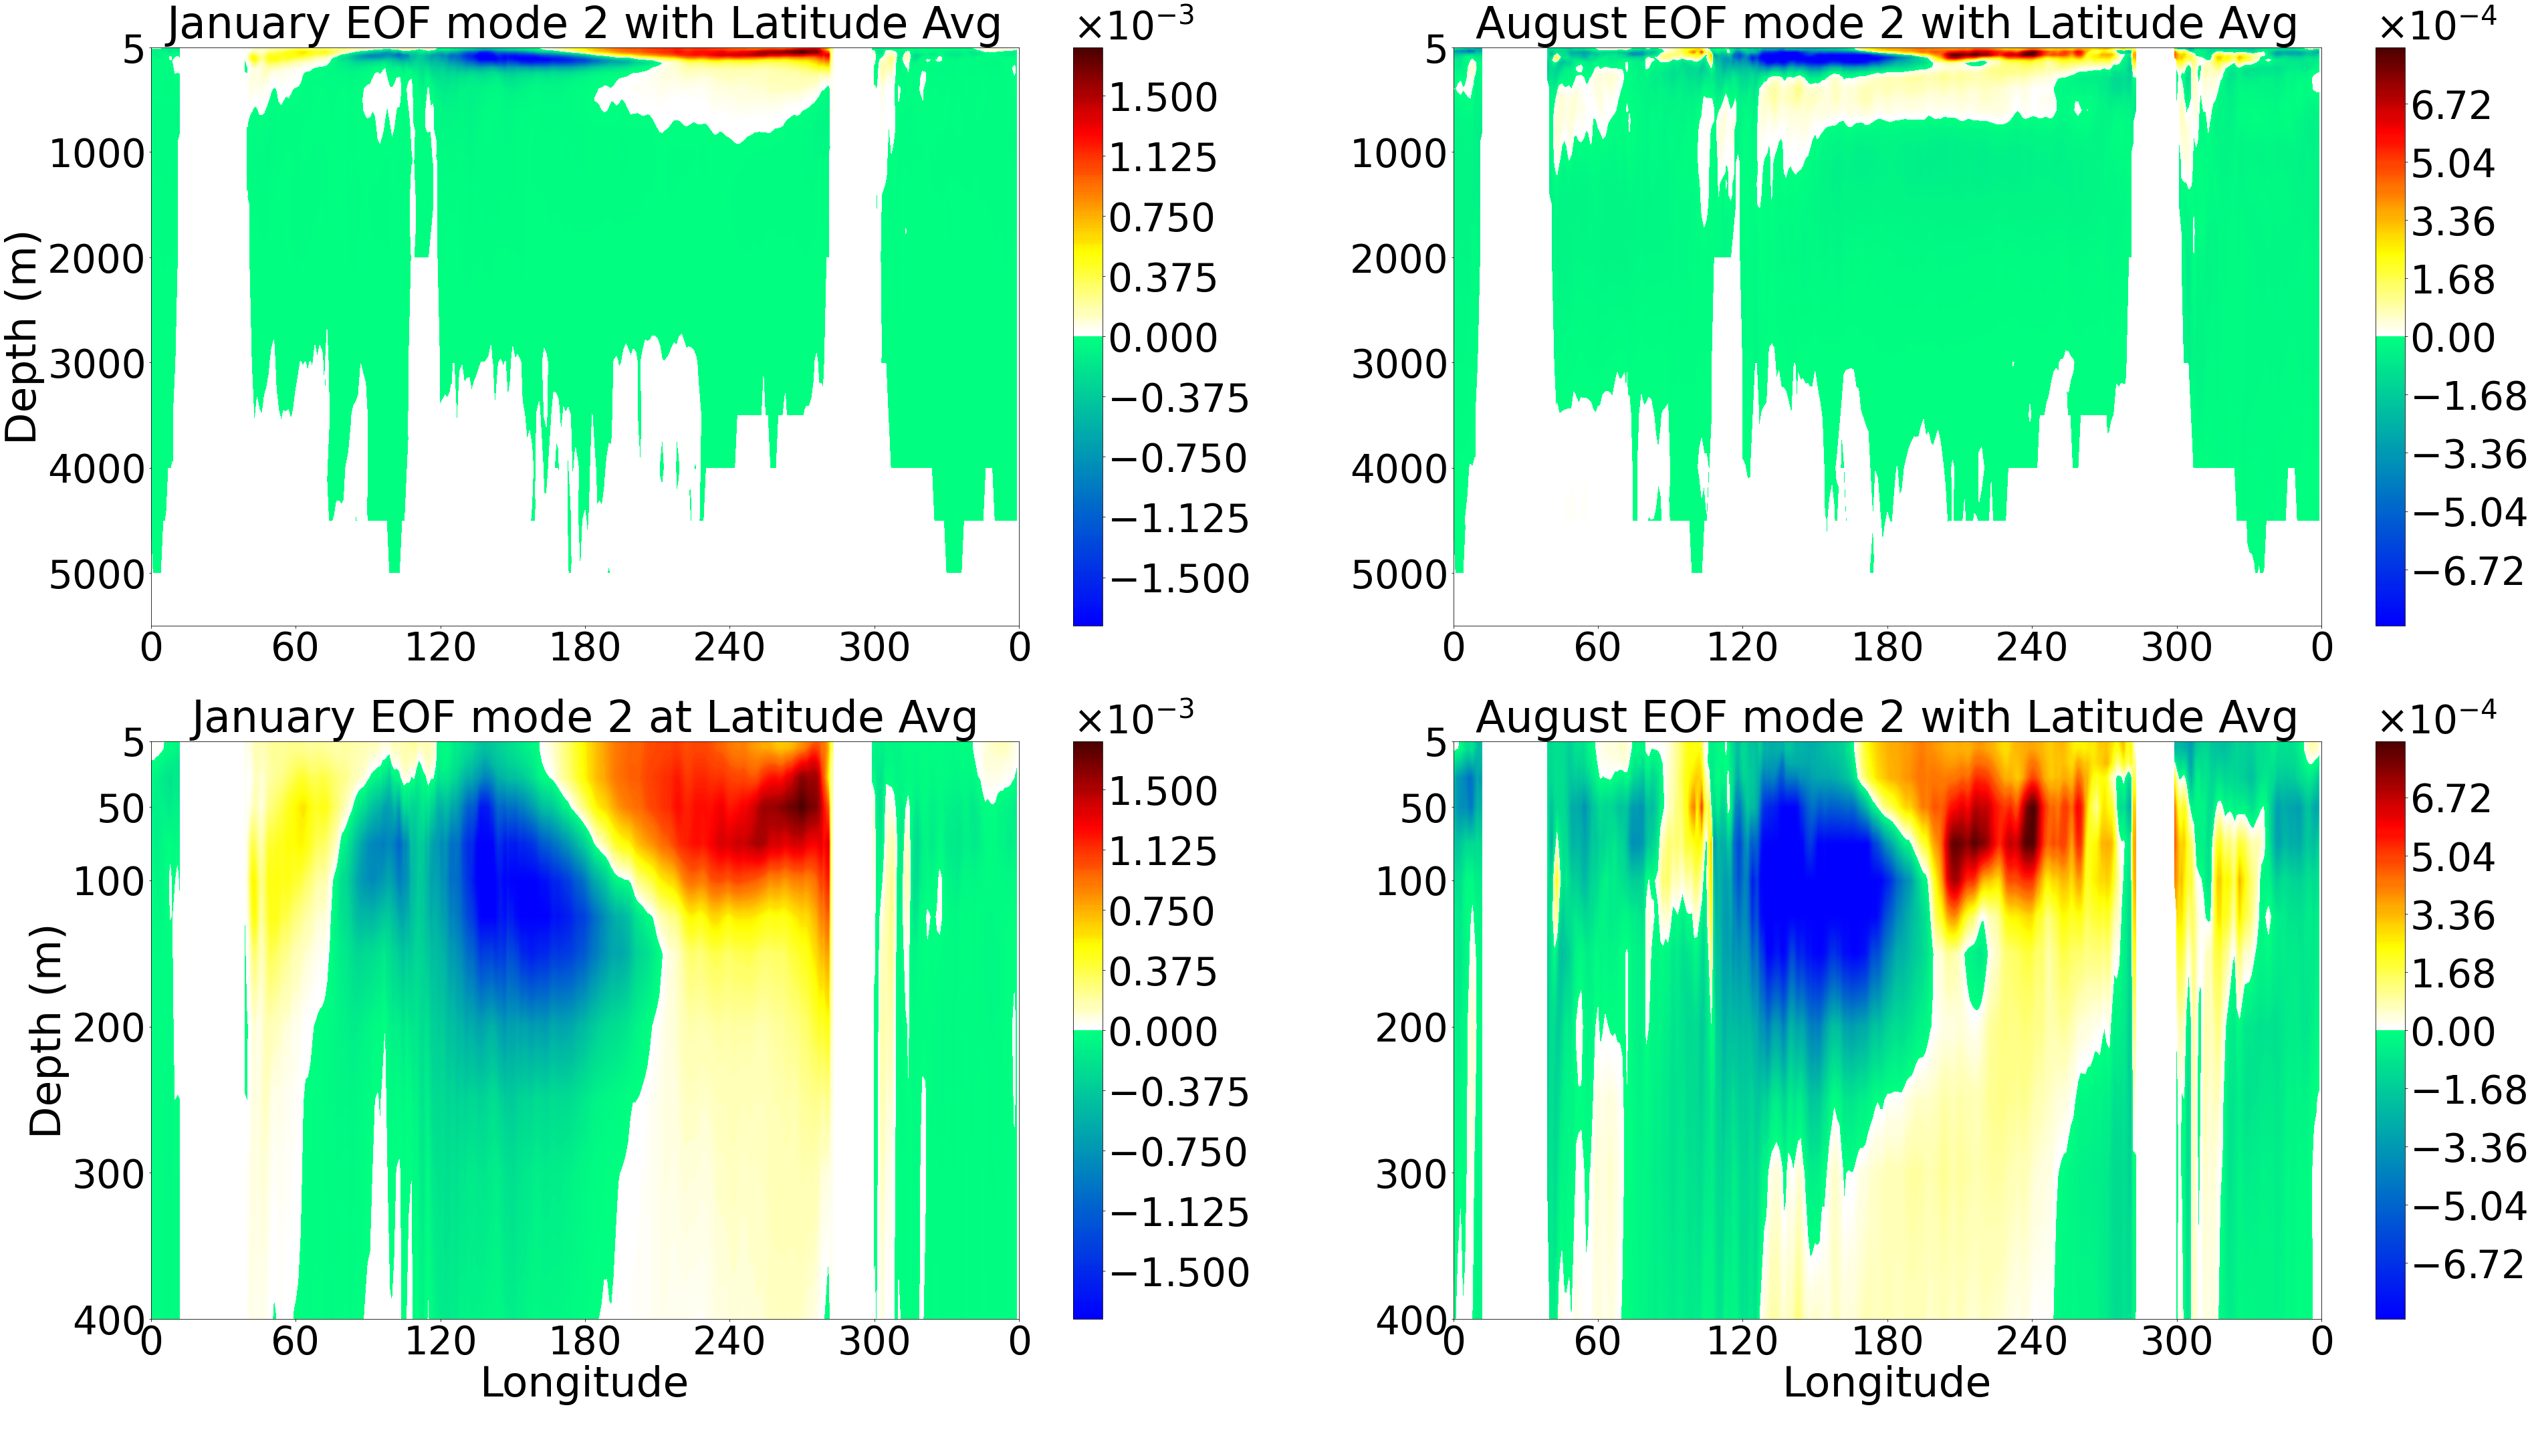

In [28]:
mode =2

fig = plt.figure(figsize=(64.,35.))
title_sz = 65
label_sz =58
exp_sz = 58

#------------
# first row
# left
ax = fig.add_subplot(2,2,1)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    Z = np.nanmean(crosssec1[:,80:100,:,mode-1], axis = 1) # avg from lat 10N to lat 10s

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lons, 0-np.array(depths), surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('January EOF mode '+str(mode)+' with Latitude Avg' , size = title_sz)


plt.ylabel("Depth (m)", size = label_sz+5)
plt.yticks([-5, -1000, -2000, -3000, -4000, -5000], [5, 1000, 2000, 3000, 4000, 5000], fontsize = label_sz)
plt.xticks(np.linspace(0,360,7),[  0,  60, 120, 180, 240, 300, 0], fontsize = label_sz)

#------------
# first row
# right

ax = fig.add_subplot(2,2,2)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    Z = np.nanmean(crosssec2[:,80:100,:,mode-1], axis = 1) # avg from lat 10N to lat 10s

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit
plt.contourf(lons, 0-np.array(depths), -surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('August EOF mode '+str(mode)+' with Latitude Avg', size = title_sz)


plt.yticks([-5, -1000, -2000, -3000, -4000, -5000], [5, 1000, 2000, 3000, 4000, 5000], fontsize = label_sz)
plt.xticks(np.linspace(0,360,7),[  0,  60, 120, 180, 240, 300, 0], fontsize = label_sz)

#------------
# second row
# left
ax = fig.add_subplot(2,2,3)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    foo = np.nanmean(crosssec1[:,80:100,:,mode-1], axis = 1) # avg from lat 10N to lat 10s
Z = foo[0:13,:] # only first 13 depths

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lons, 0-np.array(depths[0:13]), surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('January EOF mode '+str(mode)+' at Latitude Avg' , size = title_sz)


plt.xlabel("Longitude\n", size =label_sz+5)
plt.ylabel("Depth (m)", size = label_sz+5)
plt.yticks([-5, -50, -100, -200, -300, -400], [5, 50, 100, 200, 300, 400],  fontsize = label_sz)
plt.xticks(np.linspace(0,360,7),[  0,  60, 120, 180, 240, 300, 0], fontsize = label_sz)


#------------
# second row
# right
ax = fig.add_subplot(2,2,4)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    foo = np.nanmean(crosssec2[:,80:100,:,mode-1], axis = 1)# avg from lat 10N to lat 10s
Z = foo[0:13,:] # only first 13 depths

zmin = np.nanmin(Z)  # minimum EOF value
zmax = np.nanmax(Z)  # maximum EOF value
zlim = np.minimum(np.abs(zmin), zmax) # which is bigger in magnitude
surface = np.clip(Z, -zlim, zlim) # cut off values at that limit

plt.contourf(lons, 0-np.array(depths[0:13]), -surface, 300,cmap = newcmp2)

cbar = plt.colorbar(format = matplotlib.ticker.ScalarFormatter(useMathText=True)) # define colorbar with scientific notation
cbar.ax.yaxis.get_offset_text().set_fontsize(exp_sz) # change exp size
cbar.ax.yaxis.OFFSETTEXTPAD = 11 # moving exponent so it doesnt overlap
cbar.ax.yaxis.set_offset_position('left') # set exponent position
cbar.ax.tick_params(labelsize=label_sz) # set tick length
cbar.formatter.set_powerlimits((0, 0))  # format ticks so they are scientific notation 
cbar.update_ticks()

plt.title('August EOF mode '+str(mode)+' with Latitude Avg' , size = title_sz)


plt.xlabel("Longitude\n", size =label_sz+5)
plt.yticks([-5, -50, -100, -200, -300, -400], [5, 50, 100, 200, 300, 400], fontsize = label_sz)
plt.xticks(np.linspace(0,360,7),[  0,  60, 120, 180, 240, 300, 0], fontsize = label_sz)

plt.show()


### Figure 12

In [213]:
mon_index = 1
month = months[mon_index-1]
url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/eigen/' + month + '_evec.csv' # Jan evecs URL
eigvecs1 = pd.read_csv(url,header = None)
eigvecs1 = np.array(eigvecs1)

mon_index = 8
month = months[mon_index-1]
url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/eigen/' + month + '_evec.csv' # Aug evecs URL
eigvecs2 = pd.read_csv(url,header = None)
eigvecs2 = np.array(eigvecs2)

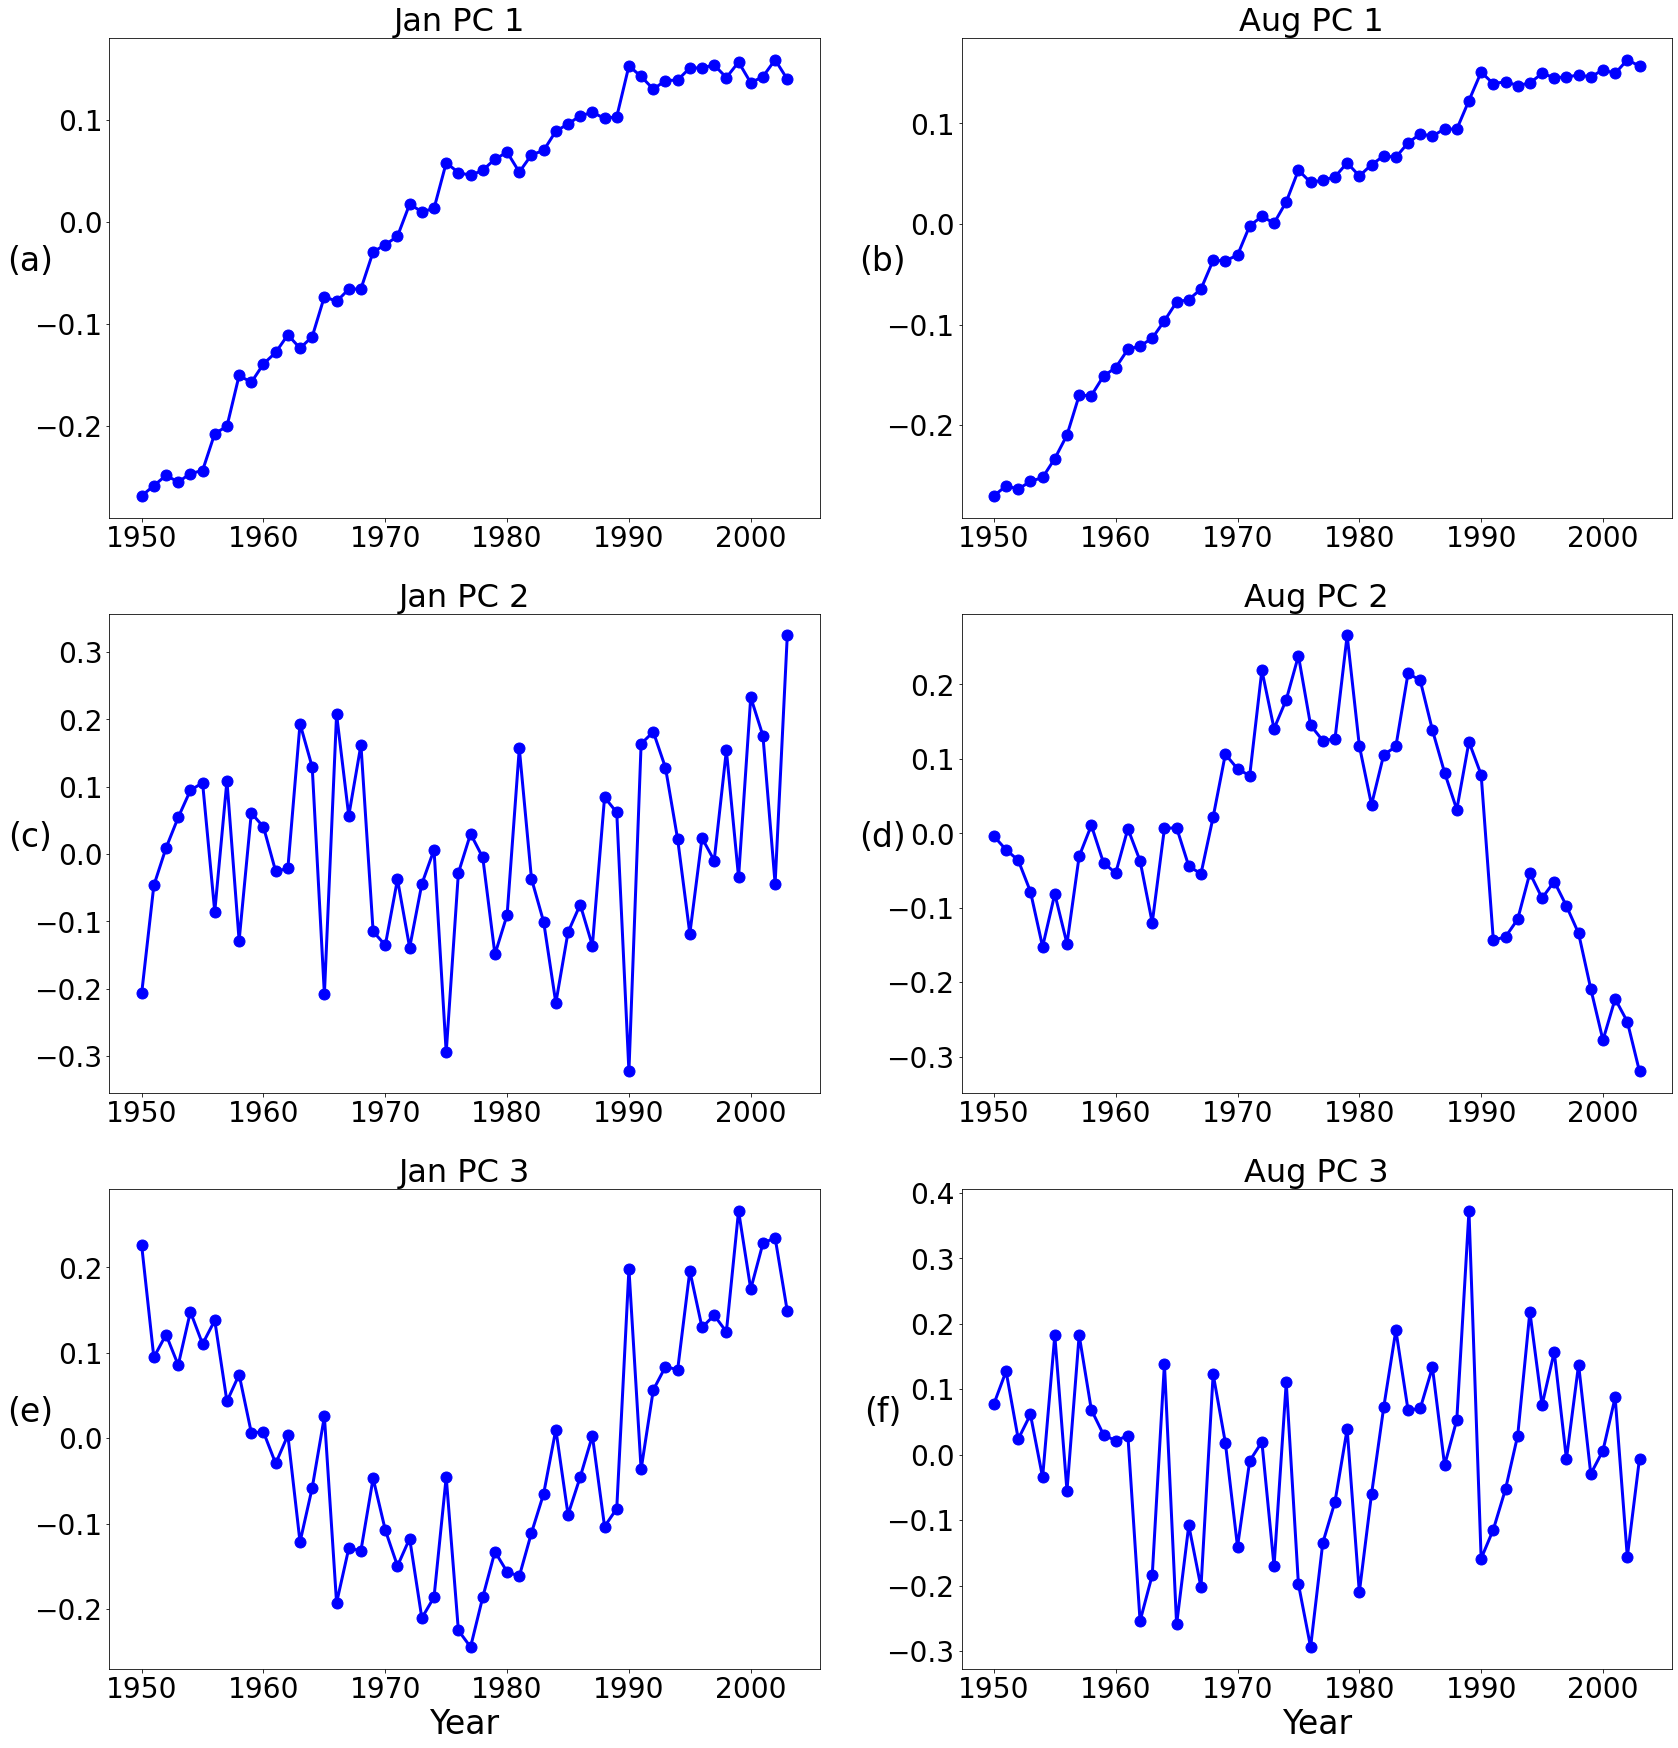

In [214]:
fig = plt.figure(figsize=(28.,30.))
title_sz = 32
label_sz = 28
label_sz1 = 33
line = 3
#------------
# first row
# left
ax = fig.add_subplot(3,2,1)
mode = 0
time = np.arange(1950,2004)

plt.plot(time, -eigvecs1[:,mode],'b', marker = 'o', linewidth=line, markersize = line+8)


plt.title('Jan PC 1 ', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ylabel('(a)',rotation=0 ,fontsize = label_sz1)

# right
# first plot
ax = fig.add_subplot(3,2,2)

plt.plot(time, eigvecs2[:,mode],'b', marker = 'o', linewidth=line, markersize = line+8)

plt.title('Aug PC 1 ', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ylabel('(b)',rotation=0 ,fontsize = label_sz1)

#------------
# Second row
# left
ax = fig.add_subplot(3,2,3)
mode = 1
time = np.arange(1950,2004)

plt.plot(time, -eigvecs1[:,mode],'b', marker = 'o', linewidth=line, markersize = line+8)


plt.title('Jan PC 2', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ylabel('(c)',rotation=0 ,fontsize = label_sz1)

# Second row
# right
ax = fig.add_subplot(3,2,4)

plt.plot(time, -eigvecs2[:,mode],'b', marker = 'o',linewidth=line, markersize = line+8)

plt.title('Aug PC 2', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ylabel('(d)',rotation=0 ,fontsize = label_sz1)

#------------
# Third row
# left
ax = fig.add_subplot(3,2,5)
mode = 2
time = np.arange(1950,2004)

plt.plot(time, -eigvecs1[:,mode],'b', marker = 'o', linewidth=line, markersize = line+8)


plt.title('Jan PC 3', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.xlabel('Year', fontsize = label_sz1)
plt.ylabel('(e)',rotation=0 ,fontsize = label_sz1)

# Third row
# right
ax = fig.add_subplot(3,2,6)

plt.plot(time, -eigvecs2[:,mode],'b', marker = 'o',linewidth=line, markersize = line+8)

plt.title('Aug PC 3', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.xlabel('Year', fontsize = label_sz1)
plt.ylabel('(f)',rotation=0 ,fontsize = label_sz1)

plt.show()

### Figure 13

In [211]:
data = np.empty((12,54))
for i in range(12):
    month = months[i]
    url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/detrended_eigen/'+month+'_eval.csv' # detrended eval URL
    evals = pd.read_csv(url,header = None)
    data[i,:] = np.array(np.squeeze(evals))

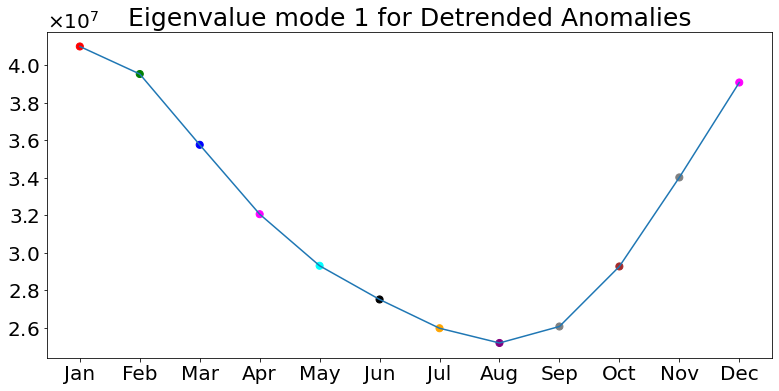

In [212]:
# plotting evals for the first mode
plt.figure(figsize=(13.,6.)) # fig size
title_sz = 25
label_sz = 20
mode =  1 # plot 2nd Mode

colors = np.array(["red","green","blue","magenta","cyan","black","orange","purple","grey","brown","gray","magenta"]) # point colors
time = np.arange(1,13) # plotting 12 points
plt.scatter(time, data[:,mode -1], c = colors, s =50) # plot evals as points
plt.plot(time, data[:,mode -1]) # connect each moint

# axis labels
plt.title('Eigenvalue mode '+ str(mode)+' for Detrended Anomalies', fontsize = title_sz)
plt.xticks(time, months , fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ticklabel_format(useMathText=True, axis='y', scilimits=(0,0)) # format y axis to scientific notation

# set size of exponent
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(label_sz)

plt.show()

### Figure 14

In [215]:
mon_index = 1
month = months[mon_index-1]
url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/detrended_eigen/' + month + '_evec.csv' # detrended Jan evecs
eigvecs1 = pd.read_csv(url,header = None)
eigvecs1 = np.array(eigvecs1)

mon_index = 8
month = months[mon_index-1]
url = 'https://media.githubusercontent.com/media/dlafarga/calc_3D_EOFs/main/detrended_eigen/' + month + '_evec.csv' # detrended Aug evecs
eigvecs2 = pd.read_csv(url,header = None)
eigvecs2 = np.array(eigvecs2)

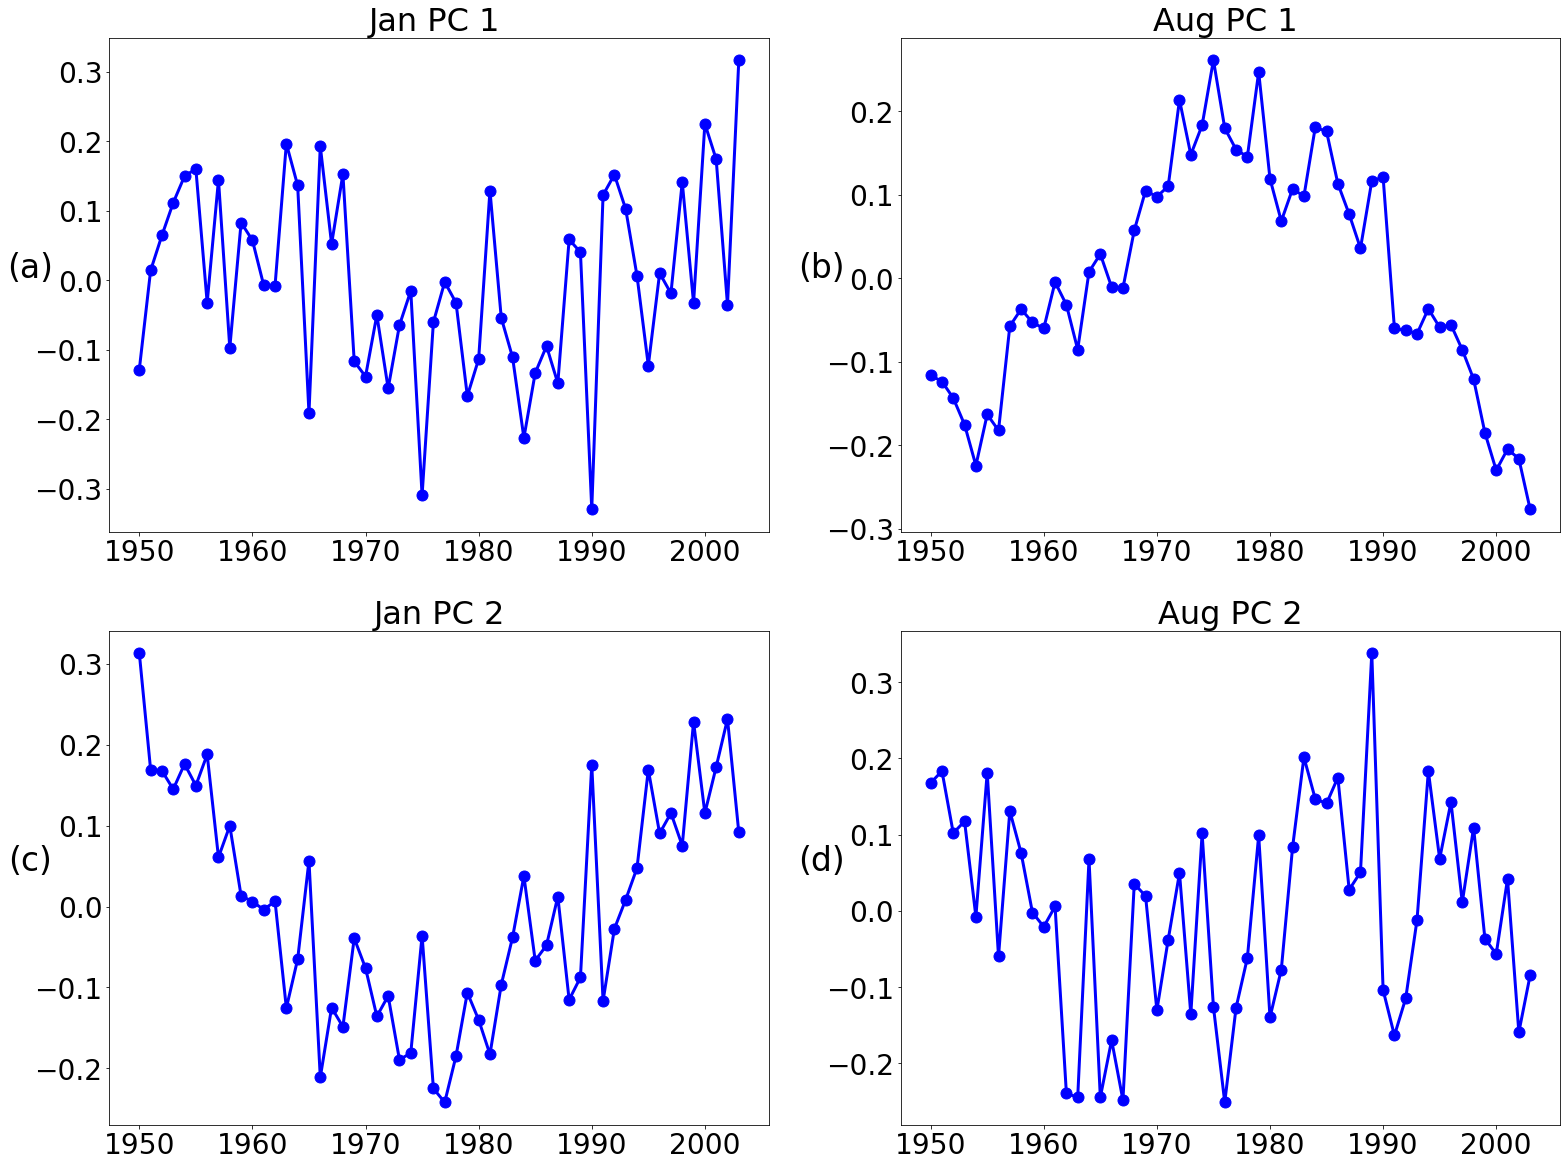

In [216]:
fig = plt.figure(figsize=(26.,20.))
title_sz = 32
label_sz = 28
label_sz1 = 33
line = 3
#------------
# first row
# left
ax = fig.add_subplot(2,2,1)
mode = 0
time = np.arange(1950,2004)

plt.plot(time, -eigvecs1[:,mode],'b', marker = 'o', linewidth=line, markersize = line+8)


plt.title('Jan PC 1 ', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ylabel('(a)',rotation=0 ,fontsize = label_sz1)

# right
# first plot
ax = fig.add_subplot(2,2,2)

plt.plot(time, eigvecs2[:,mode],'b', marker = 'o', linewidth=line, markersize = line+8)

plt.title('Aug PC 1 ', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ylabel('(b)',rotation=0 ,fontsize = label_sz1)

#------------
# first row
# left
ax = fig.add_subplot(2,2,3)
mode = 1
time = np.arange(1950,2004)

plt.plot(time, eigvecs1[:,mode],'b', marker = 'o', linewidth=line, markersize = line+8)


plt.title('Jan PC 2', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ylabel('(c)',rotation=0 ,fontsize = label_sz1)

# right
# first plot
ax = fig.add_subplot(2,2,4)

plt.plot(time, eigvecs2[:,mode],'b', marker = 'o',linewidth=line, markersize = line+8)

plt.title('Aug PC 2', fontsize = title_sz)
plt.xticks(fontsize = label_sz)
plt.yticks(fontsize = label_sz)
plt.ylabel('(d)',rotation=0 ,fontsize = label_sz1)



plt.show()